<a href="https://colab.research.google.com/github/gengyuedong/Embedding/blob/main/Pybinding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

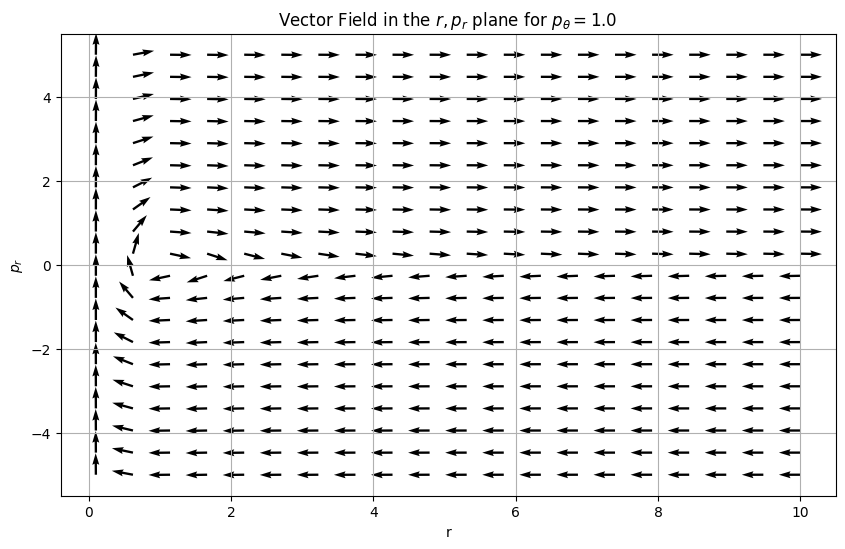

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
m = 1.0  # mass
k = 1.0  # gravitational constant
p_theta_0 = 1.0  # specific value for p_theta

# Define the range for r and p_r, avoiding r = 0
r = np.linspace(0.1, 10, 20)
p_r = np.linspace(-5, 5, 20)

# Create a meshgrid
R, P_r = np.meshgrid(r, p_r)

# Compute the vector field
dot_r = P_r / m
dot_p_r = (p_theta_0**2 / (m * R**3)) - (k / R**2)

# Normalize the vectors for better visualization
magnitude = np.sqrt(dot_r**2 + dot_p_r**2)
dot_r_normalized = dot_r / magnitude
dot_p_r_normalized = dot_p_r / magnitude

# Plotting the vector field
plt.figure(figsize=(10, 6))
plt.quiver(R, P_r, dot_r_normalized, dot_p_r_normalized, angles='xy')
plt.xlabel('r')
plt.ylabel('$p_r$')
plt.title('Vector Field in the $r, p_r$ plane for $p_\\theta = {}$'.format(p_theta_0))
plt.grid(True)
plt.show()


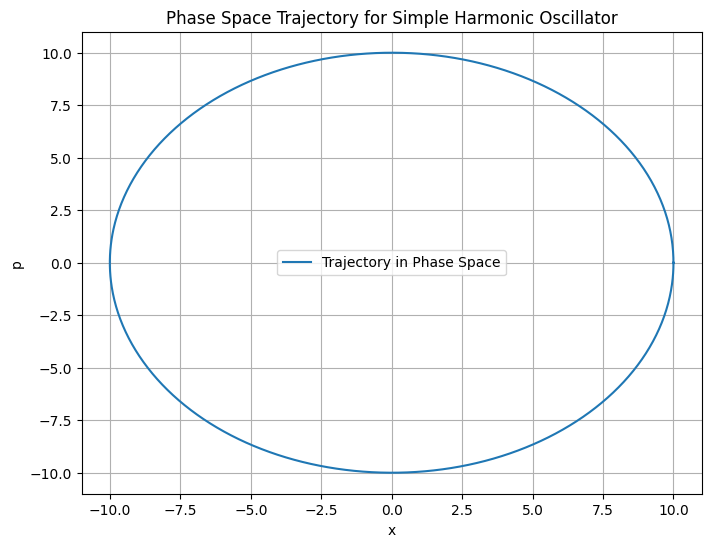

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Hamiltonian for a simple harmonic oscillator
def hamiltonian(p, x):
    return (p**2 / 2) + (x**2 / 2)

# Define the equations of motion
def equations_of_motion(t, state):
    x, p = state
    dxdt = p
    dpdt = -x
    return [dxdt, dpdt]

# Set up the initial conditions and time points
initial_conditions = [1.0, 0.0]  # Starting at x=1, p=0
t = np.linspace(0, 2 * np.pi, 1000)  # One complete period

# Solve the equations of motion using scipy's solve_ivp
from scipy.integrate import solve_ivp

sol = solve_ivp(equations_of_motion, [t[0], t[-1]], initial_conditions, t_eval=t)

# Extract the solution
x = sol.y[0]
p = sol.y[1]

# Plot the trajectory in phase space
plt.figure(figsize=(8, 6))
plt.plot(x, p, label='Trajectory in Phase Space')
plt.xlabel('x')
plt.ylabel('p')
plt.title('Phase Space Trajectory for Simple Harmonic Oscillator')
plt.grid(True)
plt.legend()
plt.show()


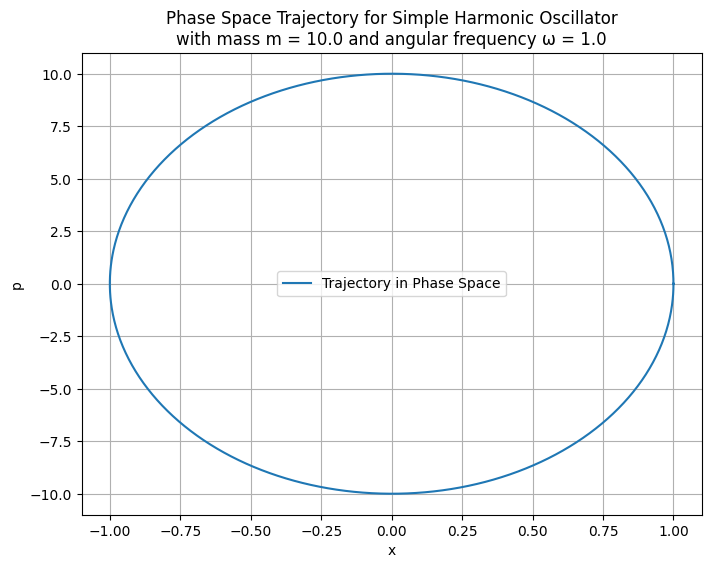

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
m = 10.0  # mass
omega = 1.0  # angular frequency

# Define the Hamiltonian for a simple harmonic oscillator
def hamiltonian(p, x):
    return (p**2 / (2*m)) + (m * omega**2 * x**2 / 2)

# Define the equations of motion
def equations_of_motion(t, state):
    x, p = state
    dxdt = p / m
    dpdt = -m * omega**2 * x
    return [dxdt, dpdt]

# Set up the initial conditions and time points
initial_conditions = [1.0, 0.0]  # Starting at x=1, p=0
t = np.linspace(0, 2 * np.pi, 1000)  # One complete period

# Solve the equations of motion using scipy's solve_ivp
from scipy.integrate import solve_ivp

sol = solve_ivp(equations_of_motion, [t[0], t[-1]], initial_conditions, t_eval=t)

# Extract the solution
x = sol.y[0]
p = sol.y[1]

# Plot the trajectory in phase space
plt.figure(figsize=(8, 6))
plt.plot(x, p, label='Trajectory in Phase Space')
plt.xlabel('x')
plt.ylabel('p')
plt.title('Phase Space Trajectory for Simple Harmonic Oscillator\nwith mass m = {} and angular frequency ω = {}'.format(m, omega))
plt.grid(True)
plt.legend()
plt.show()


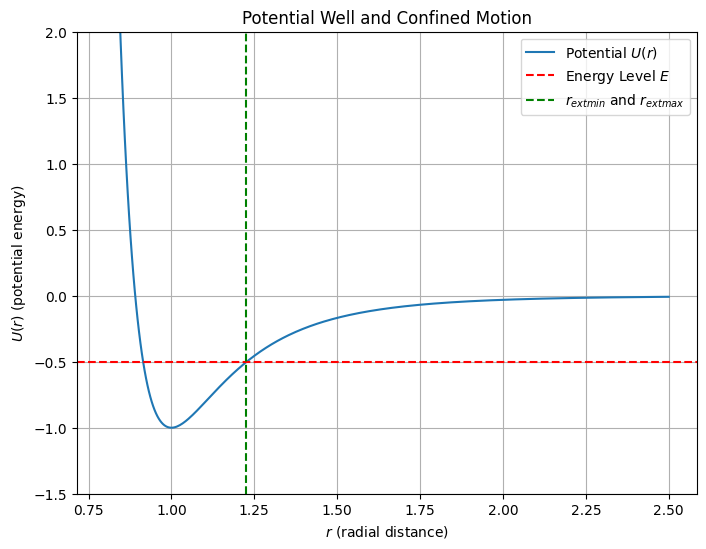

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the potential function
def potential(r, D=1, r0=1):
    return D * ((r0/r)**12 - 2 * (r0/r)**6)

# Generate radial distances
r = np.linspace(0.8, 2.5, 400)
r = r[r > 0]  # Avoid division by zero

# Calculate potential values
U = potential(r)

# Energy level for confinement, choosing an energy slightly above the minimum
E = -0.5

# Plotting the potential
plt.figure(figsize=(8, 6))
plt.plot(r, U, label='Potential $U(r)$')
plt.axhline(y=E, color='r', linestyle='--', label='Energy Level $E$')

# Marking r_min and r_max
r_min = r[np.argmin(np.abs(U - E))]
plt.axvline(x=r_min, color='g', linestyle='--', label='$r_{\text{min}}$ and $r_{\text{max}}$')

# Enhancements
plt.title('Potential Well and Confined Motion')
plt.xlabel('$r$ (radial distance)')
plt.ylabel('$U(r)$ (potential energy)')
plt.ylim(-1.5, 2)
plt.legend()
plt.grid(True)

plt.show()


<ipython-input-14-7b3c8303beab>:18: RuntimeWarning: invalid value encountered in sqrt
  return ell / (r**2 * np.sqrt(2 * mu * (E - potential(r))))


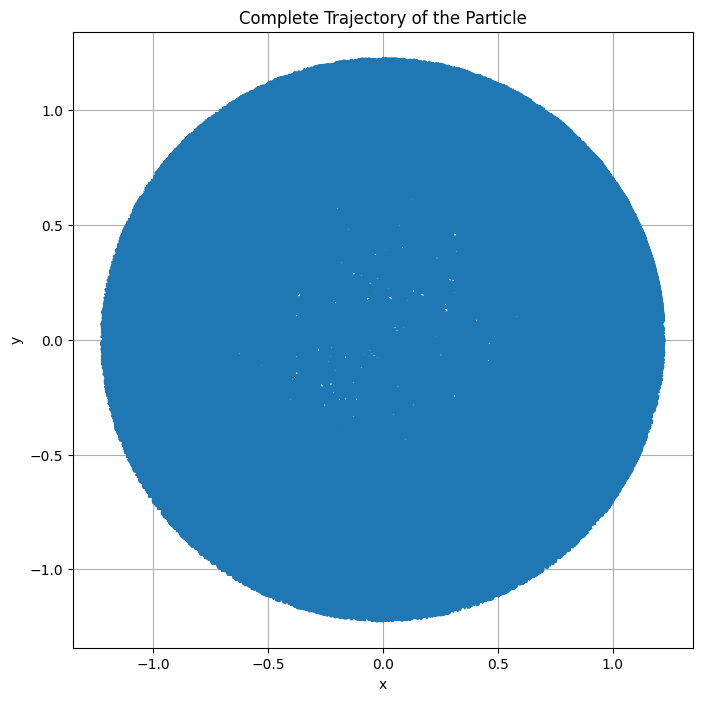

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants
mu = 1  # Reduced mass
E = -0.5  # Energy level
r0 = 1  # Equilibrium position
D = 1  # Depth of potential

# Define potential function
def potential(r):
    return D * ((r0/r)**12 - 2 * (r0/r)**6)

# Define function to compute derivative of phi with respect to r
def dphi_dr(r, ell):
    try:
        return ell / (r**2 * np.sqrt(2 * mu * (E - potential(r))))
    except ValueError:  # Handle case when the sqrt argument goes negative
        return 0

# Integrate phi from r_min to r_max
def integrate_phi(r_min, r_max, ell):
    phi_values = []
    r_values = np.linspace(r_min, r_max, 50000)
    phi = 0
    for i in range(len(r_values) - 1):
        r1 = r_values[i]
        r2 = r_values[i + 1]
        # Average the derivative to improve numerical stability
        phi_increment = 0.5 * (dphi_dr(r1, ell) + dphi_dr(r2, ell)) * (r2 - r1)
        phi += phi_increment
        phi_values.append(phi)
    return r_values[:-1], phi_values

# Perform the integration
ell = 100000  # Angular momentum
r_min = 1
r_max = find_r_max(r_min, E)
r1, phi1 = integrate_phi(r_min, r_max, ell)
r2, phi2 = integrate_phi(r_max, r_min, -ell)  # Reverse the motion

# Concatenate the results for full oscillation
r_full = np.concatenate([r1, r2])
phi_full = np.concatenate([phi1, [2 * phi1[-1] - p for p in reversed(phi2)]])

# Convert to Cartesian coordinates for plotting
x_full = r_full * np.cos(phi_full)
y_full = r_full * np.sin(phi_full)

# Plot the trajectory
plt.figure(figsize=(8, 8))
plt.plot(x_full, y_full)
plt.scatter([0], [0], color='red')  # Mark the center
plt.title('Complete Trajectory of the Particle')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.show()


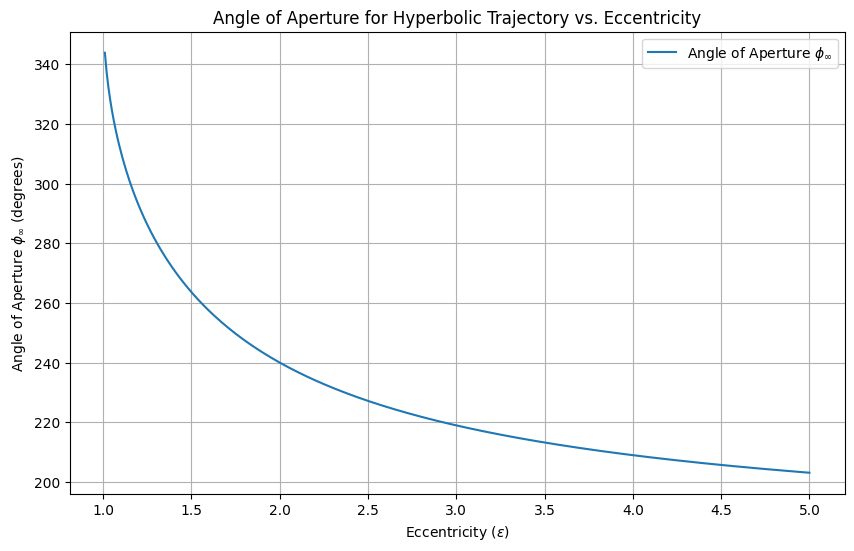

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of epsilon values (greater than 1)
epsilon = np.linspace(1.01, 5, 400)

# Calculate the angle of aperture phi_infinity in degrees
phi_infinity = 2 * np.arccos(-1 / epsilon) * (180 / np.pi)  # Convert radians to degrees

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epsilon, phi_infinity, label='Angle of Aperture $\phi_{\infty}$')
plt.title('Angle of Aperture for Hyperbolic Trajectory vs. Eccentricity')
plt.xlabel('Eccentricity ($\epsilon$)')
plt.ylabel('Angle of Aperture $\phi_{\infty}$ (degrees)')
plt.grid(True)
plt.legend()
plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'Arc'

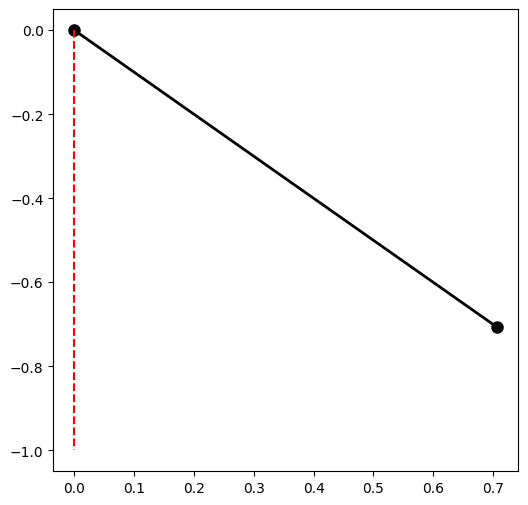

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define parameters for the diagram
l = 1  # length of the pendulum
theta = np.pi / 4  # example angle of the pendulum from the vertical

# Coordinates of the pendulum's pivot (origin)
origin = np.array([0, 0])

# Coordinates of the pendulum bob
bob = np.array([l * np.sin(theta), -l * np.cos(theta)])

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Draw the pendulum
ax.plot([origin[0], bob[0]], [origin[1], bob[1]], 'ko-', lw=2, markersize=8, label='Pendulum')

# Draw the vertical line for reference
ax.plot([origin[0], origin[0]], [0, -l], 'r--', label='Vertical')

# Draw the rotation arc to indicate motion path
arc = plt.Arc((0, 0), 0.2, 0.2, angle=0, theta1=0, theta2=theta * 180 / np.pi, color='blue', label='Theta')
ax.add_patch(arc)

# Adding annotations
ax.annotate(r'$\theta$', xy=(0.1, -0.05), xytext=(0.15, -0.2),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Set limits and aspect
ax.set_xlim(-1.2 * l, 1.2 * l)
ax.set_ylim(-1.2 * l, 1.2 * l)
ax.set_aspect('equal')

# Add legend
ax.legend()

# Add title and labels
ax.set_title("Rotating Pendulum on a Turntable")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")

# Show plot
plt.grid(True)
plt.show()


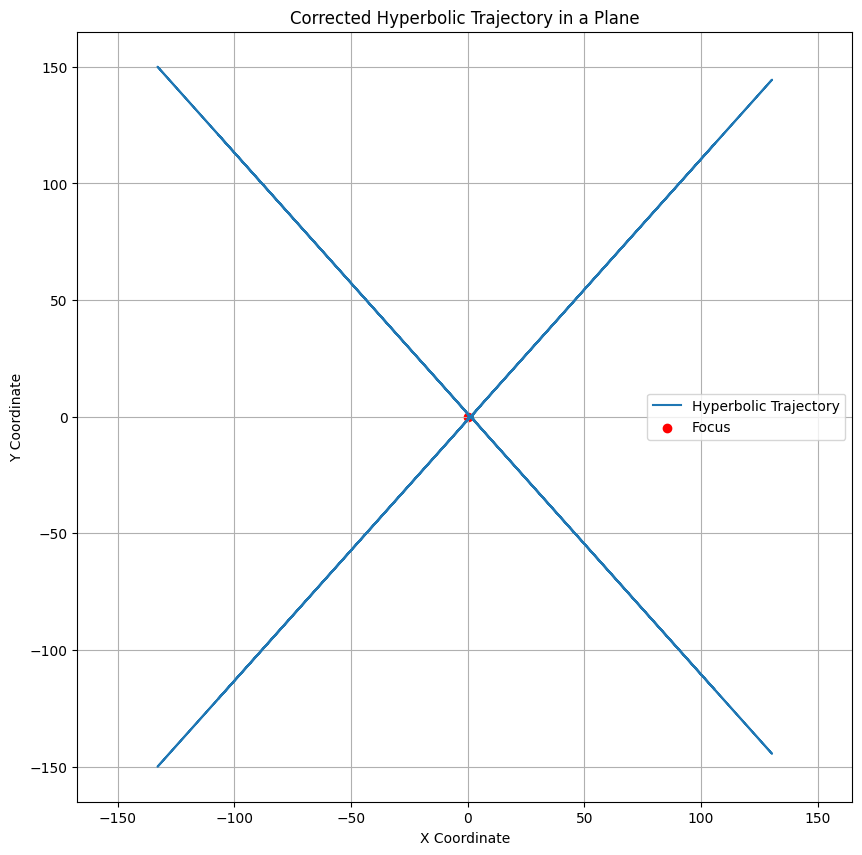

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 1.5  # Eccentricity, indicating a hyperbolic trajectory
p = 1  # Semi-latus rectum

# More generous phi range around the asymptotes
phi_infinity = 2 * np.arccos(-1 / epsilon)
phi_values = np.linspace(-phi_infinity * 1.1, phi_infinity * 1.1, 1000)

# Hyperbolic trajectory equation
r_values = p / (1 + epsilon * np.cos(phi_values))

# Cartesian coordinates for the plot
x_values = r_values * np.cos(phi_values)
y_values = r_values * np.sin(phi_values)

plt.figure(figsize=(10, 10))
plt.plot(x_values, y_values, label='Hyperbolic Trajectory')
plt.scatter([0], [0], color='red', label='Focus')  # Central focus
plt.title('Corrected Hyperbolic Trajectory in a Plane')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.axis('equal')  # Ensuring equal scaling on both axes
plt.legend()
plt.show()


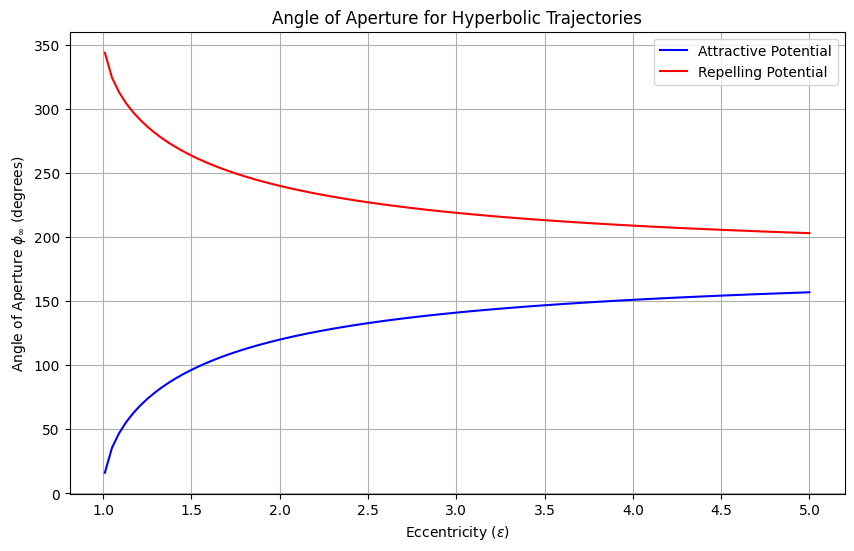

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define eccentricities, ranging from slightly above 1 to 5
epsilons = np.linspace(1.01, 5, 100)

# Calculate the angles of aperture for both attractive and repelling potentials
phi_infinity_attractive = 2 * np.arccos(1 / epsilons)
phi_infinity_repelling = 2 * np.pi - 2 * np.arccos(1 / epsilons)

# Convert from radians to degrees for easier interpretation
phi_infinity_attractive_deg = np.degrees(phi_infinity_attractive)
phi_infinity_repelling_deg = np.degrees(phi_infinity_repelling)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epsilons, phi_infinity_attractive_deg, label='Attractive Potential', color='blue')
plt.plot(epsilons, phi_infinity_repelling_deg, label='Repelling Potential', color='red')
plt.title('Angle of Aperture for Hyperbolic Trajectories')
plt.xlabel('Eccentricity ($\epsilon$)')
plt.ylabel('Angle of Aperture $\phi_{\infty}$ (degrees)')
plt.grid(True)
plt.legend()
plt.show()


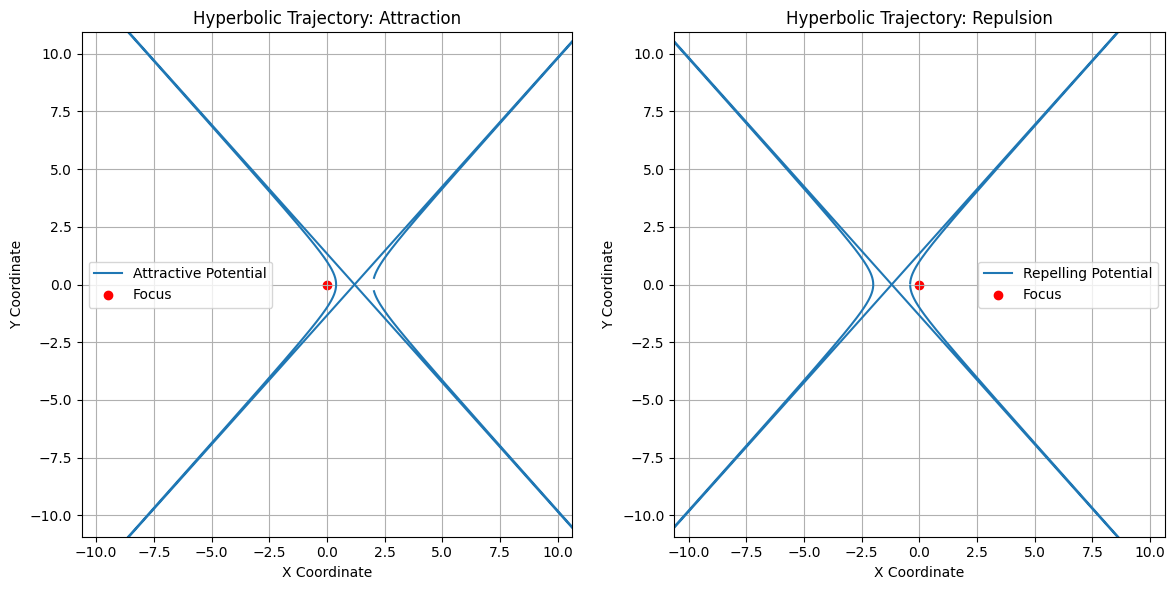

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
epsilon = 1.5
p = 1
phi = np.linspace(-3, 3, 400)  # Limited range to avoid division by zero near cos(phi) = -1/epsilon

# Calculate trajectories
r_attractive = p / (1 + epsilon * np.cos(phi))
r_repelling = p / (1 - epsilon * np.cos(phi))

# Convert to Cartesian coordinates
x_attractive = r_attractive * np.cos(phi)
y_attractive = r_attractive * np.sin(phi)
x_repelling = r_repelling * np.cos(phi)
y_repelling = r_repelling * np.sin(phi)

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_attractive, y_attractive, label='Attractive Potential')
plt.scatter([0], [0], color='red', label='Focus')
plt.title('Hyperbolic Trajectory: Attraction')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.axis('equal')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_repelling, y_repelling, label='Repelling Potential')
plt.scatter([0], [0], color='red', label='Focus')
plt.title('Hyperbolic Trajectory: Repulsion')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.axis('equal')
plt.grid(True)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.legend()

plt.tight_layout()
plt.show()


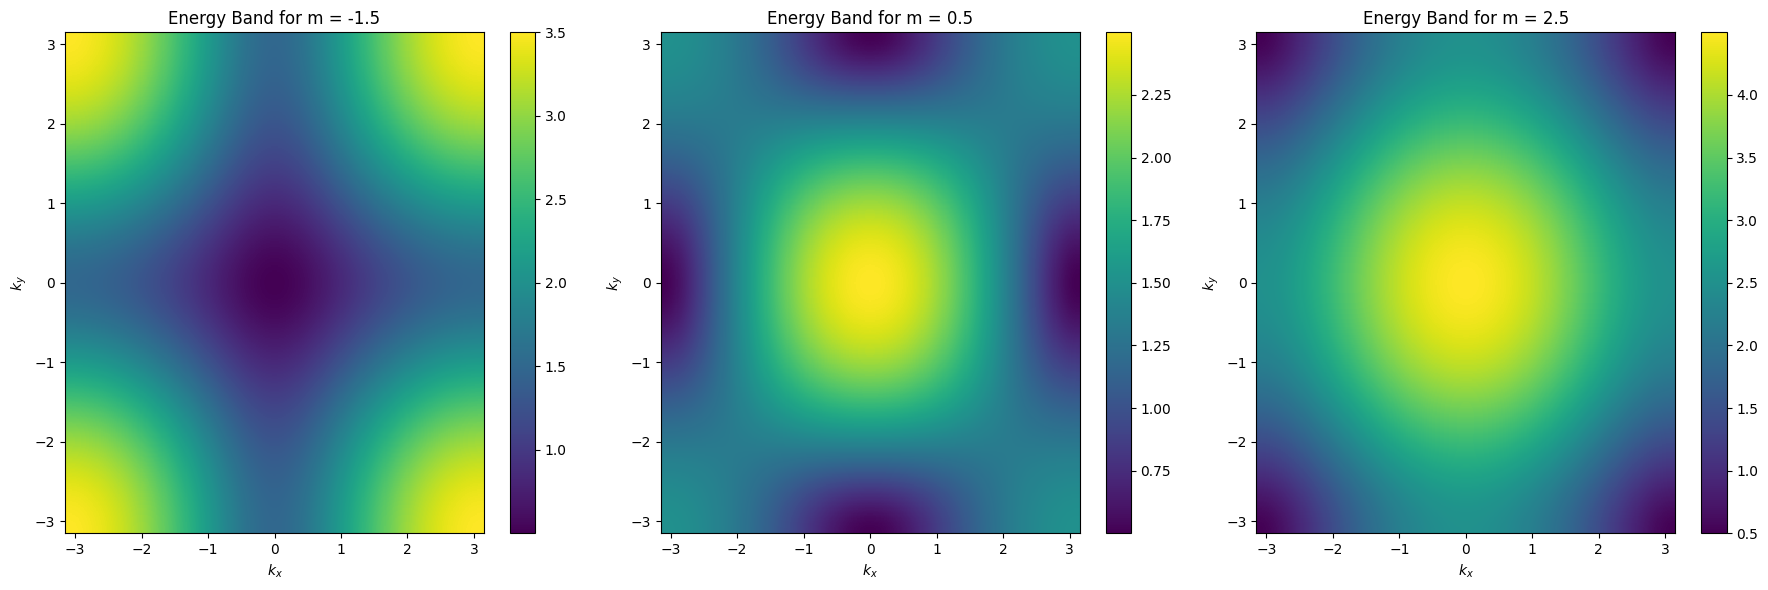

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the Hamiltonian
m_values = [-1.5, 0.5, 2.5]  # different m values to plot the band structure
kx = np.linspace(-np.pi, np.pi, 400)
ky = np.linspace(-np.pi, np.pi, 400)

kx, ky = np.meshgrid(kx, ky)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, m in enumerate(m_values):
    # Compute the Hamiltonian components for the square lattice model
    H0 = np.sin(kx)  # sigma_1 component
    H1 = np.sin(ky)  # sigma_2 component
    H2 = m + np.cos(kx) + np.cos(ky)  # sigma_3 component

    # Compute the energy bands
    E = np.sqrt(H0**2 + H1**2 + H2**2)

    # Plotting
    ax = axes[i]
    c = ax.pcolormesh(kx, ky, E, shading='auto', cmap='viridis')
    ax.set_title(f'Energy Band for m = {m}')
    ax.set_xlabel('$k_x$')
    ax.set_ylabel('$k_y$')
    fig.colorbar(c, ax=ax)

plt.tight_layout()
plt.show()


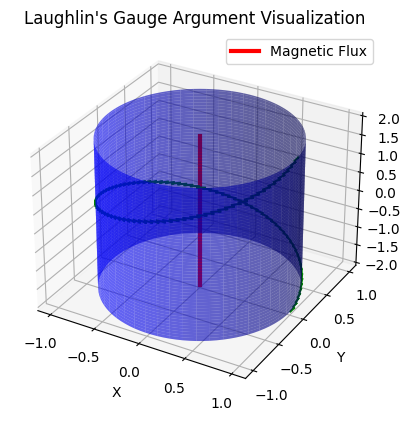

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and a 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define parameters for the cylinder
z = np.linspace(-2, 2, 100)
theta = np.linspace(0, 2 * np.pi, 100)
theta_grid, z_grid = np.meshgrid(theta, z)
x_grid = np.cos(theta_grid)
y_grid = np.sin(theta_grid)

# Plot the cylinder
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.6, color='blue')

# Add magnetic flux line through the center
ax.plot(np.zeros_like(z), np.zeros_like(z), z, color='red', linewidth=3, label='Magnetic Flux')

# Create arrows to show induced current
for i in range(len(z)):
    ax.quiver(x_grid[0, i], y_grid[0, i], z[i], -y_grid[0, i], x_grid[0, i], 0, color='green', length=0.1)

# Setting labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Laughlin\'s Gauge Argument Visualization')

# Adding legend
ax.legend()

# Show the plot
plt.show()


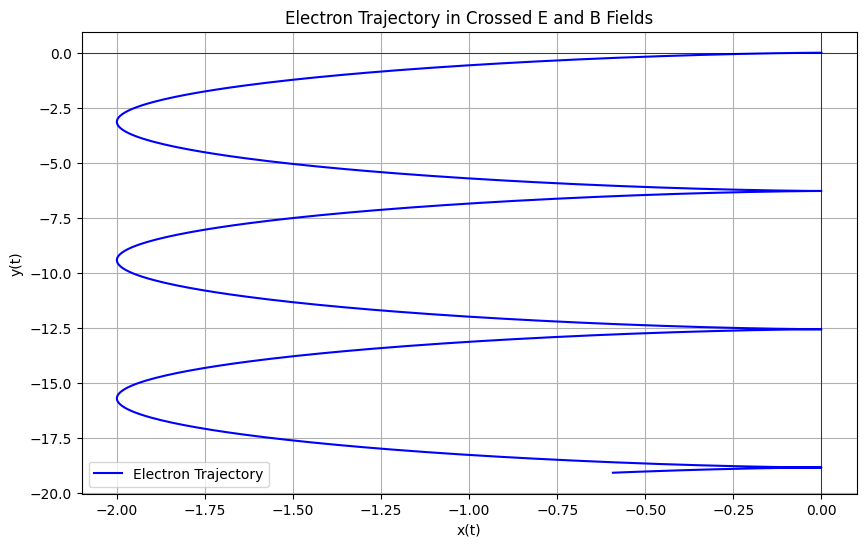

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
E = 1  # Electric field (in appropriate units)
B = 1  # Magnetic field (in appropriate units)
e = 1  # Charge magnitude (in appropriate units)
m = 1  # Mass (in appropriate units)
omega_c = e * B / m  # Cyclotron frequency

# Time parameters
t = np.linspace(0, 20, 1000)  # Time array

# Solutions for x(t) and y(t) assuming initial conditions v0 = 0
A = 1  # Assume A = 1 for simplicity
x = (-E / (m * omega_c**2)) * (1-np.cos(omega_c*t))
y = (-E / (m * omega_c)) * (t-1/omega_c*np.sin(omega_c*t))

# Plotting the trajectory
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Electron Trajectory', color='b')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Electron Trajectory in Crossed E and B Fields')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()


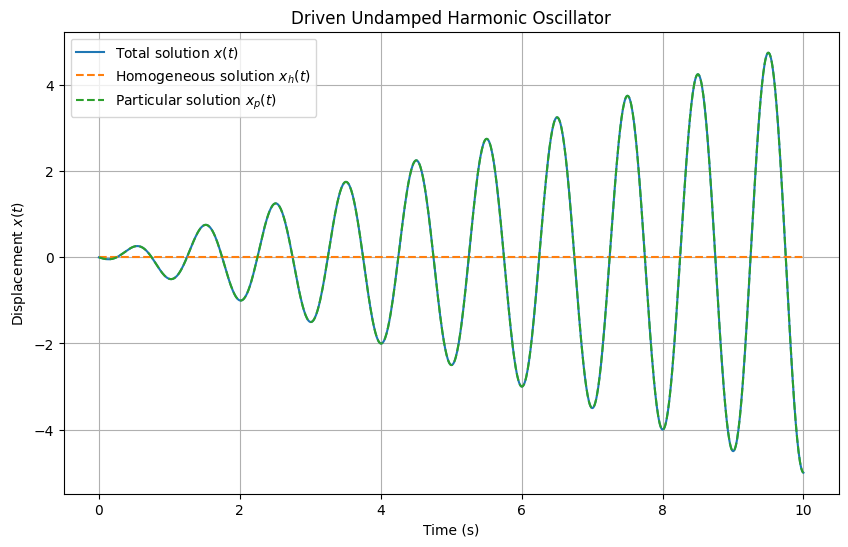

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
F0 = 1.0      # Amplitude of the driving force
m = 1.0       # Mass
omega_0 = 2 * np.pi # Natural frequency (rad/s)
omega_ext = 2 * np.pi * 1.0001 # External frequency (rad/s)
x0 = 0.0      # Initial position
v0 = 0.0      # Initial velocity

# Time array
t = np.linspace(0, 10, 1000)

# Homogeneous solution
x_h = x0 * np.cos(omega_0 * t) + (v0 / omega_0) * np.sin(omega_0 * t)

# Particular solution (beats)
A = F0 / m * omega_ext / (omega_0**2 - omega_ext**2)
x_p = A * (np.sin(omega_ext * t) - np.sin(omega_0 * t))

# Total solution
x = x_h + x_p

# Plotting the solution
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Total solution $x(t)$')
plt.plot(t, x_h, '--', label='Homogeneous solution $x_h(t)$')
plt.plot(t, x_p, '--', label='Particular solution $x_p(t)$')
plt.title('Driven Undamped Harmonic Oscillator')
plt.xlabel('Time (s)')
plt.ylabel('Displacement $x(t)$')
plt.legend()
plt.grid(True)
plt.show()


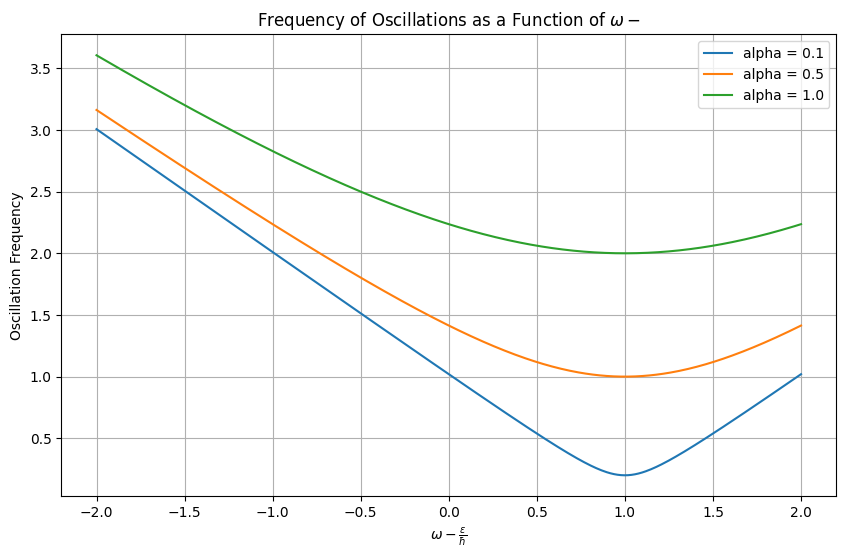

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsilon = 1.0  # energy difference
hbar = 1.0     # reduced Planck's constant
alpha_values = [0.1, 0.5, 1.0]  # different driving amplitudes

# Frequency range
omega_range = np.linspace(-2, 2, 400)

# Calculate omega_osc and plot
plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    omega_osc = np.sqrt((epsilon - hbar * omega_range)**2 + 4 * alpha**2)
    plt.plot(omega_range, omega_osc, label=f'alpha = {alpha}')

plt.xlabel(r'$\omega - \frac{\epsilon}{\hbar}$')
plt.ylabel('Oscillation Frequency')
plt.title('Frequency of Oscillations as a Function of $\omega - \frac{\epsilon}{\hbar}$')
plt.legend()
plt.grid(True)
plt.show()


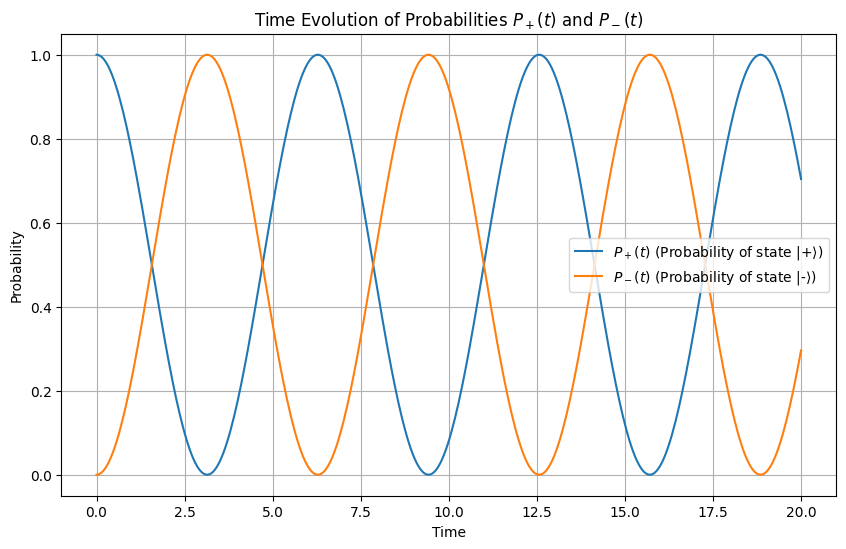

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsilon = 1.0  # energy difference
hbar = 1.0     # reduced Planck's constant
alpha = 0.5    # driving amplitude

# Time evolution parameters
t = np.linspace(0, 20, 400)
omega_range = np.linspace(-2, 2, 400)

# Define a function to calculate probabilities P+ and P-
def probabilities(omega):
    delta = epsilon - hbar * omega
    omega_osc = np.sqrt(delta**2 + 4 * alpha**2)
    P_minus = np.sin(omega_osc * t / 2)**2
    P_plus = 1 - P_minus
    return P_plus, P_minus

# Calculate probabilities for different omega values
omega_value = 1.0  # choose a specific driving frequency
P_plus, P_minus = probabilities(omega_value)

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot P+ and P-
plt.plot(t, P_plus, label=r'$P_+(t)$ (Probability of state |+⟩)')
plt.plot(t, P_minus, label=r'$P_-(t)$ (Probability of state |-⟩)')

# Plot settings
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Time Evolution of Probabilities $P_+(t)$ and $P_-(t)$')
plt.legend()
plt.grid(True)
plt.show()


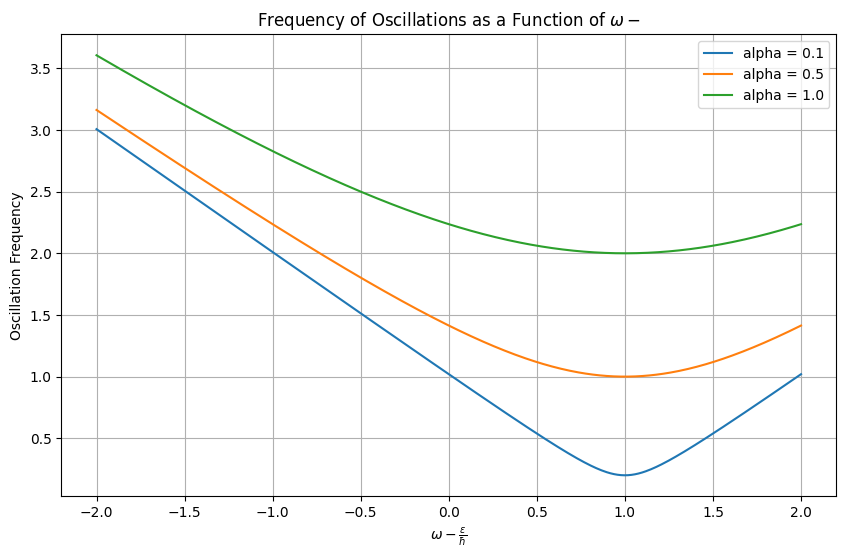

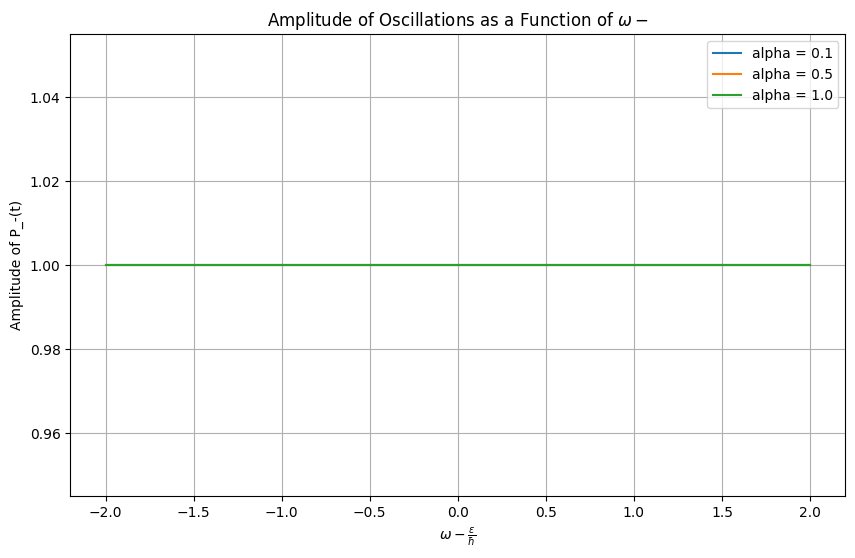

In [ ]:
# Initialize two plots for separate amplitude and frequency visualization

# Initialize plot for frequency
fig, ax1 = plt.subplots(figsize=(10, 6))

# Calculate omega_osc and plot frequency
for alpha in alpha_values:
    delta = epsilon - hbar * omega_range
    omega_osc = np.sqrt(delta**2 + 4 * alpha**2)
    ax1.plot(omega_range, omega_osc, label=f'alpha = {alpha}')

# Frequency plot settings
ax1.set_xlabel(r'$\omega - \frac{\epsilon}{\hbar}$')
ax1.set_ylabel('Oscillation Frequency')
ax1.set_title('Frequency of Oscillations as a Function of $\omega - \frac{\epsilon}{\hbar}$')
ax1.legend()
ax1.grid(True)
plt.show()

# Initialize plot for amplitude
fig, ax2 = plt.subplots(figsize=(10, 6))

# Calculate and plot amplitude
for alpha in alpha_values:
    delta = epsilon - hbar * omega_range
    omega_osc = np.sqrt(delta**2 + 4 * alpha**2)
    P_minus_amplitude = np.sin(omega_osc * np.pi / (2 * omega_osc))**2  # Representative amplitude calculation
    ax2.plot(omega_range, P_minus_amplitude, label=f'alpha = {alpha}')

# Amplitude plot settings
ax2.set_xlabel(r'$\omega - \frac{\epsilon}{\hbar}$')
ax2.set_ylabel('Amplitude of P_-(t)')
ax2.set_title('Amplitude of Oscillations as a Function of $\omega - \frac{\epsilon}{\hbar}$')
ax2.legend()
ax2.grid(True)
plt.show()


<ipython-input-9-f604a48dbe27>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (alpha / np.sqrt(2**n * np.math.factorial(n) * np.sqrt(np.pi))) * Hn(alpha * x) * np.exp(-alpha**2 * x**2 / 2)


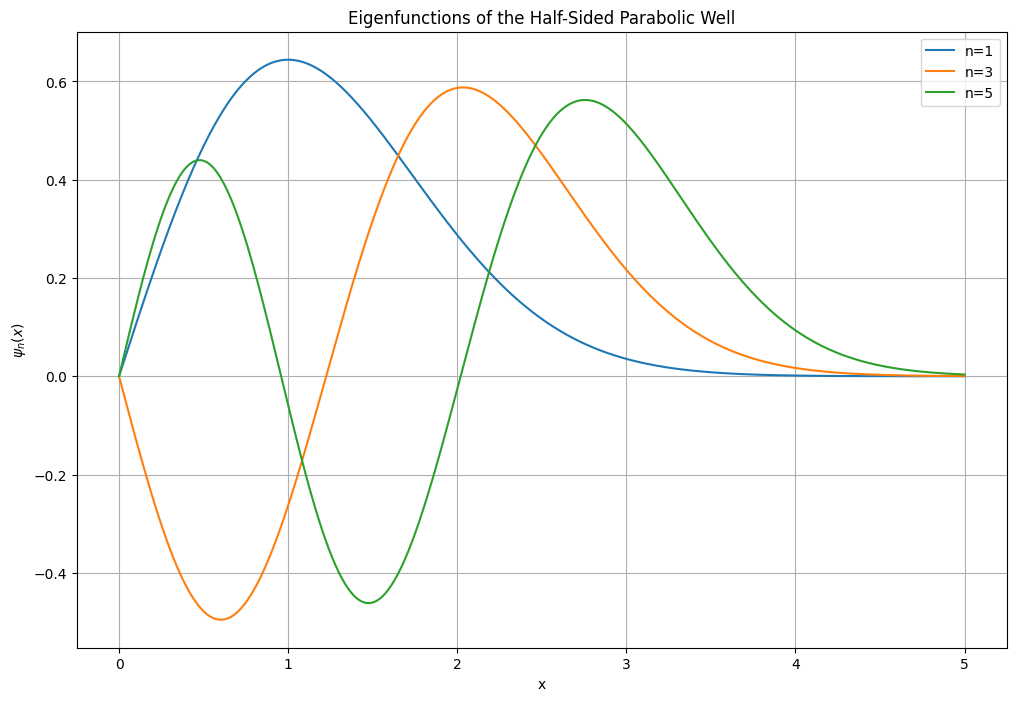

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite

# Define parameters
m = 1  # mass (arbitrary units)
k = 1  # spring constant (arbitrary units)
hbar = 1  # reduced Planck's constant (arbitrary units)
omega = np.sqrt(k / m)  # angular frequency
alpha = np.sqrt(m * omega / hbar)  # constant for wavefunctions

# Define the first few odd Hermite polynomials
n_values = [1, 3, 5]

# Define the x range for plotting
x = np.linspace(0, 5, 500)

# Define the wavefunctions for the given n values
def psi_n(x, n):
    Hn = hermite(n)
    return (alpha / np.sqrt(2**n * np.math.factorial(n) * np.sqrt(np.pi))) * Hn(alpha * x) * np.exp(-alpha**2 * x**2 / 2)

# Plotting the first few eigenfunctions
plt.figure(figsize=(12, 8))

for n in n_values:
    plt.plot(x, psi_n(x, n), label=f'n={n}')

plt.title('Eigenfunctions of the Half-Sided Parabolic Well')
plt.xlabel('x')
plt.ylabel('$\psi_n(x)$')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from scipy.integrate import quad

# Parameters
V0 = 1  # potential depth (arbitrary units)
a = 1   # width of the well (arbitrary units)
L = 10  # length of the box (arbitrary units)
T = 300 # temperature in Kelvin
k_B = 1.38e-23  # Boltzmann constant in J/K
beta = 1 / (k_B * T)

# Classical Probability P
if beta * V0 > 50:  # threshold to avoid overflow
    P_classical = 1
else:
    P_classical = (a * np.exp(beta * V0)) / (a * np.exp(beta * V0) + L - a)

# Quantum Probability P
A = np.sqrt(2 / a)  # Normalization constant for wave function
def psi_squared(x):
    return A**2 * np.cos(np.pi * x / a)**2

P_quantum, _ = quad(psi_squared, -a/2, a/2)

P_classical, P_quantum


(1, 1.0000000000000002)

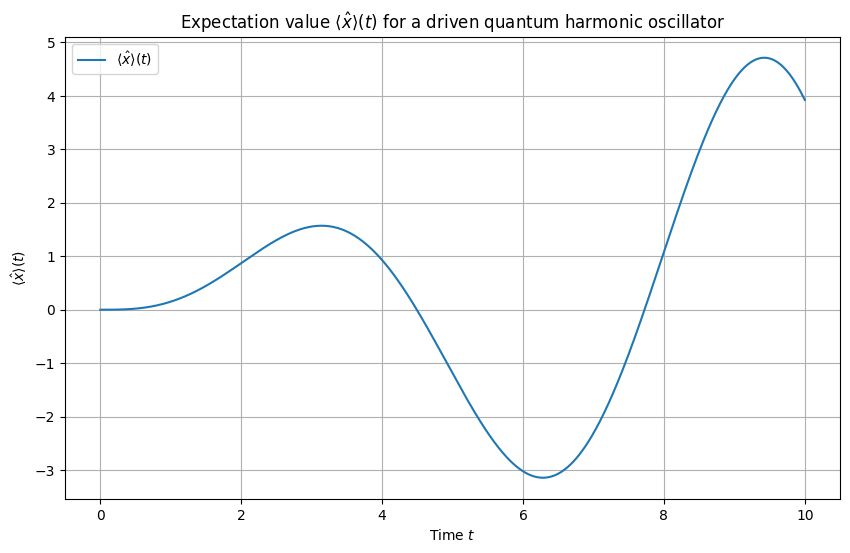

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
m = 1.0  # mass
omega = 1.0  # angular frequency
hbar = 1.0  # reduced Planck constant

# Time array
t = np.linspace(0, 10, 500)

# Arbitrary force function F(t)
def F(t):
    return np.sin(t)

# Compute <x>(t)
x_avg = (1 / (m * omega)) * np.array([np.trapz(F(t[:i]) * np.sin(omega * (t[i] - t[:i])), t[:i]) for i in range(len(t))])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, x_avg, label=r'$\langle \hat{x} \rangle(t)$')
plt.xlabel('Time $t$')
plt.ylabel(r'$\langle \hat{x} \rangle(t)$')
plt.title(r'Expectation value $\langle \hat{x} \rangle(t)$ for a driven quantum harmonic oscillator')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install pybinding

In [ ]:
# Import necessary libraries
import pybinding as pb
import matplotlib.pyplot as plt
import numpy as np

# Parameters
d = 1.0  # Unit cell length
t = 1.0  # Hopping energy

# create a simple 2D lattice with vectors a1 and a2
lattice = pb.Lattice(a1 = [d,0],a2 = [0,d])
lattice.add_sublattices(
    ('A',[0,0]) # add an atom called 'A' at position [0, 0]
)

lattice.add_hoppings(
    # (relative_index, from_sublattice, to_sublattice, energy)
    ([0,1],'A','A',t),
    ([1,0],'A','A',t)
)


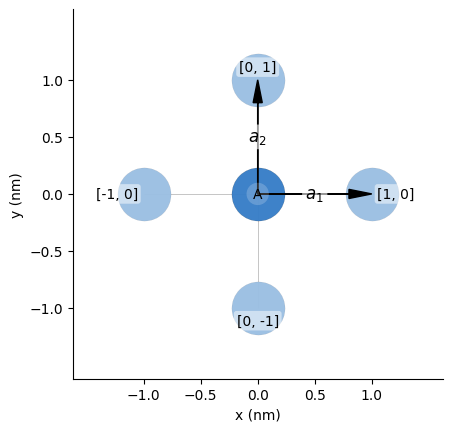

In [ ]:
lattice.plot()  # plot the lattice that was just constructed
plt.show()      # standard matplotlib show() function

In [ ]:
def square_lattice(d, t):
    lat = pb.Lattice(a1=[d, 0], a2=[0, d])
    lat.add_sublattices(('A', [0, 0]))
    lat.add_hoppings(([0, 1], 'A', 'A', t),
                     ([1, 0], 'A', 'A', t))
    return lat


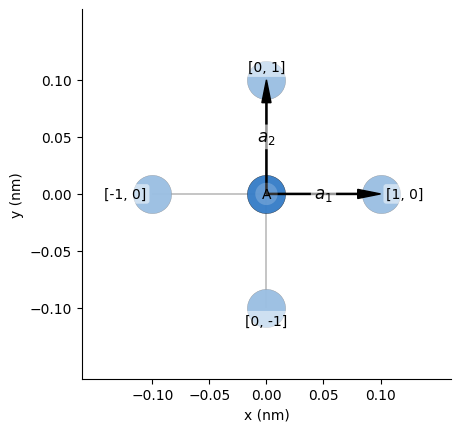

In [ ]:
lattice = square_lattice(d=.1, t=1)
lattice.plot()
plt.show()

## 2.2. Graphene

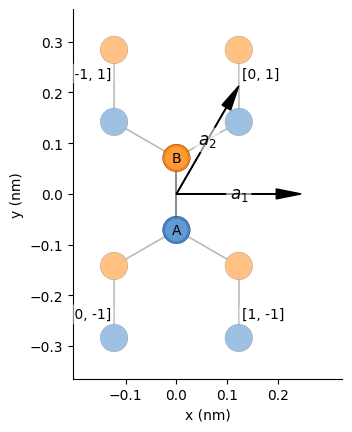

In [ ]:
from math import sqrt

def monolayer_graphene():
    a = 0.24595   # [nm] unit cell length
    a_cc = 0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[a,0],
                     a2=[a/2,a/2*sqrt(3)])
    lat.add_sublattices(
        ('A',[0,-a_cc/2]),
        ('B',[0,a_cc/2])
    )

    lat.add_hoppings(
        # inside the main cell
        ([0,0], 'A', 'B', t),
        ([1,-1],'A','B',t),
        ([0,-1],'A','B',t)
    )
    return lat


lattice = monolayer_graphene()
lattice.plot()
plt.show()


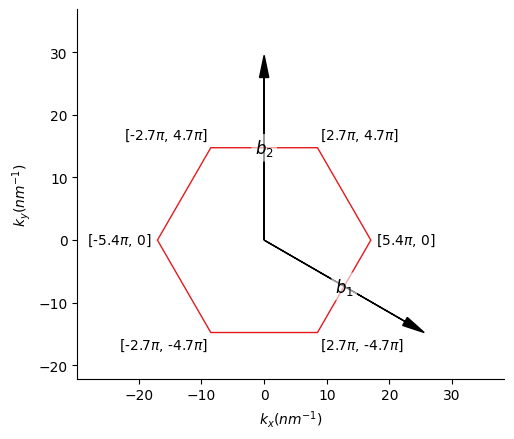

In [ ]:
lattice = monolayer_graphene()
lattice.plot_brillouin_zone()

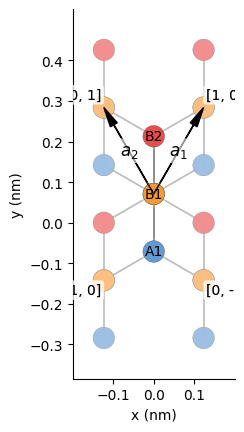

In [ ]:
from pybinding.repository import graphene
lattice = graphene.bilayer()
lattice.plot()

#3. Band Structure

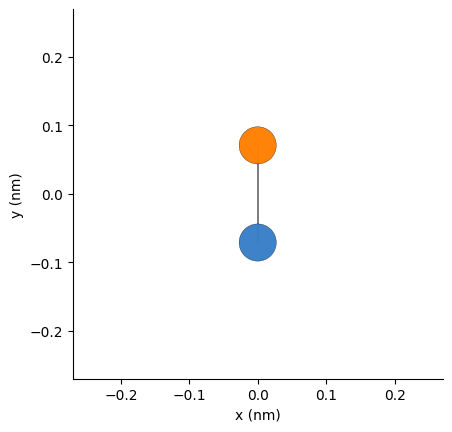

In [ ]:
from pybinding.repository import graphene

model = pb.Model(graphene.monolayer())
model.plot()

In [ ]:
model.system.x

array([0., 0.], dtype=float32)

In [ ]:
model.system.y

array([-0.071,  0.071], dtype=float32)

In [ ]:
model.system.sublattices

AliasArray([0, 1], dtype=int32)

In [ ]:
print(model.hamiltonian)

  (0, 1)	-2.8
  (1, 0)	-2.8


In [ ]:
model.hamiltonian.todense()

matrix([[ 0. , -2.8],
        [-2.8,  0. ]], dtype=float32)

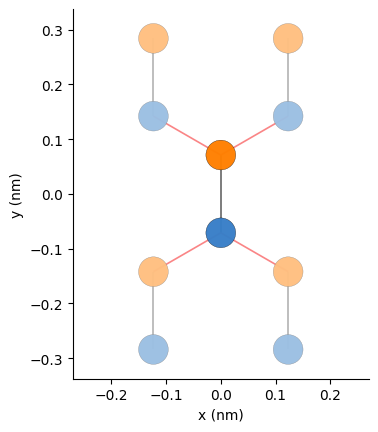

In [ ]:
model = pb.Model(
    graphene.monolayer(),
    pb.translational_symmetry()
)
model.plot()

In [ ]:
model = pb.Model(graphene.monolayer())
solver = pb.solver.lapack(model)
solver.eigenvalues

array([-2.8,  2.8], dtype=float32)

In [ ]:
solver.eigenvectors

array([[-0.70710677, -0.70710677],
       [-0.70710677,  0.70710677]], dtype=float32)

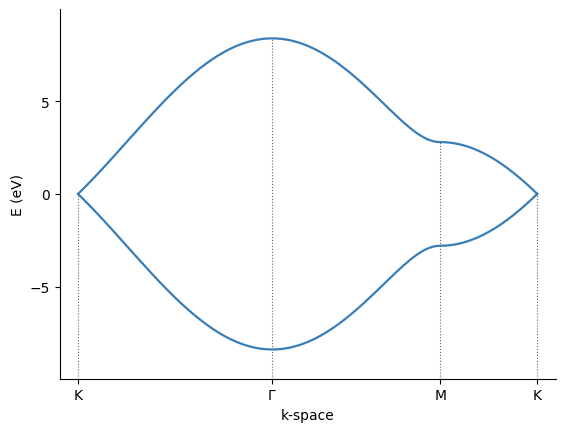

In [ ]:
from math import sqrt,pi

model = pb.Model(graphene.monolayer(),pb.translational_symmetry())
solver = pb.solver.lapack(model)

a_cc = graphene.a_cc
Gamma = [0,0]
K1 = [-4*pi / (3*sqrt(3)*a_cc), 0]
M = [0, 2*pi / (3*a_cc)]
K2 = [2*pi / (3*sqrt(3)*a_cc), 2*pi / (3*a_cc)]

bands = solver.calc_bands(K1,Gamma,M,K2)
bands.plot(point_labels=['K',r'$\Gamma$',r'M','K'])

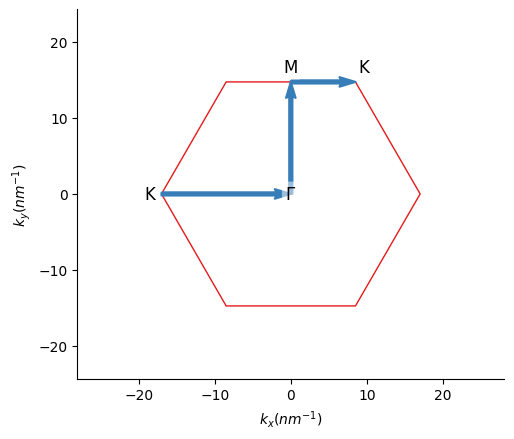

In [ ]:
model.lattice.plot_brillouin_zone(decorate=False)
bands.plot_kpath(point_labels=['K',r'$\Gamma$',r'M','K'])

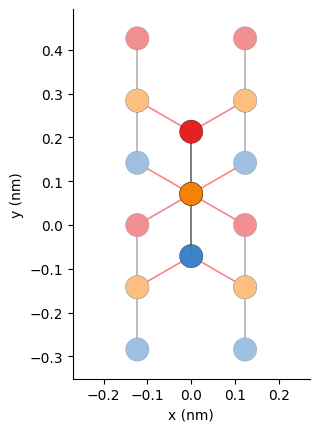

In [ ]:
model = pb.Model(graphene.bilayer(),pb.translational_symmetry())
model.plot()

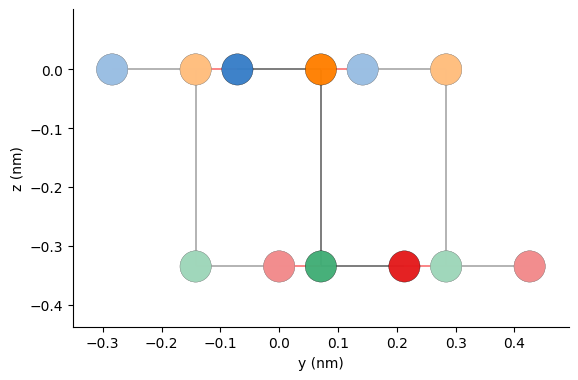

In [ ]:
model.plot(axes='yz')

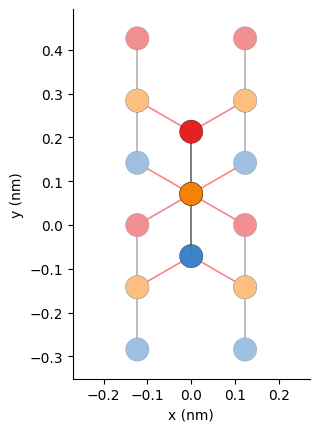

In [ ]:
model = pb.Model(graphene.bilayer(),pb.translational_symmetry())
model.plot()

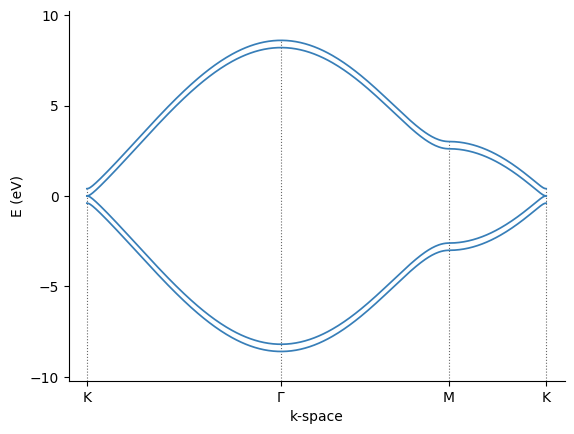

In [ ]:
solver = pb.solver.lapack(model)
bands = solver.calc_bands(K1,Gamma,M,K2)
bands.plot(point_labels=['K',r'$\Gamma$',r'M','K'])

# 4. Finite Size

In [ ]:
!pip install pybinding

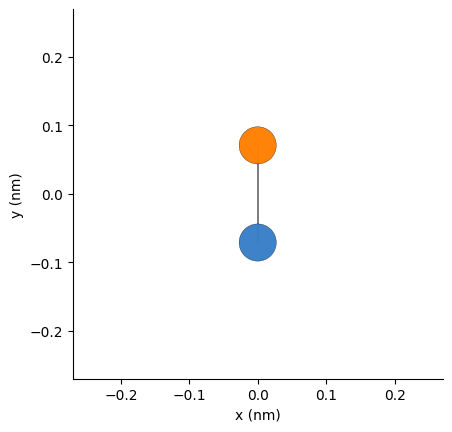

In [ ]:
import pybinding as pb
from pybinding.repository import graphene

model = pb.Model(graphene.monolayer())
model.plot()

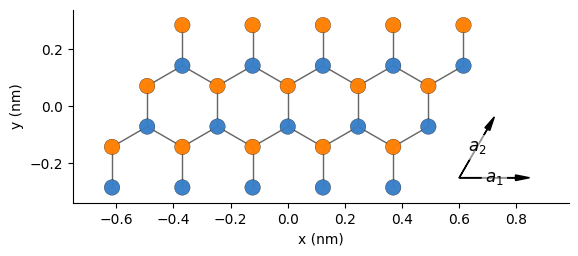

In [ ]:
model = pb.Model(
    graphene.monolayer(),
    pb.primitive(a1=5, a2=3)
)
model.plot()
model.lattice.plot_vectors(position=[0.6,-0.25])

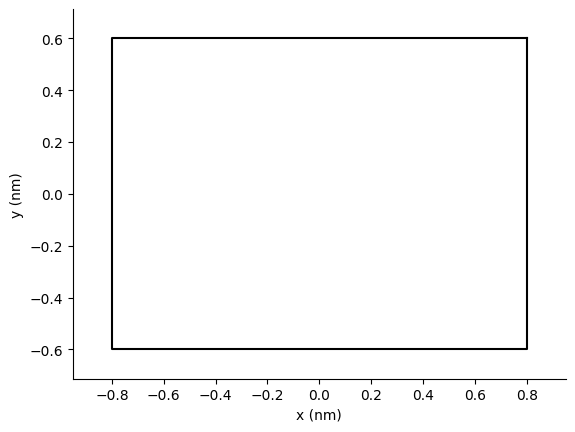

In [ ]:
def rectangle(width, height):
    x0 = width/2
    y0 = height/2
    return pb.Polygon([[x0, y0], [x0, -y0], [-x0, -y0], [-x0, y0]])

shape = rectangle(1.6,1.2)
shape.plot()

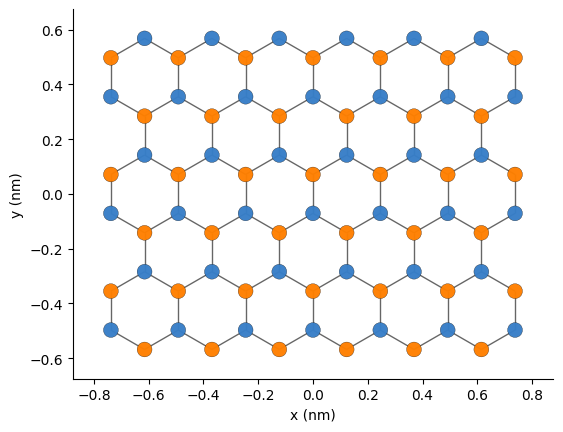

In [ ]:
model = pb.Model(
    graphene.monolayer(),
    rectangle(1.6,1.2)
)

model.plot()

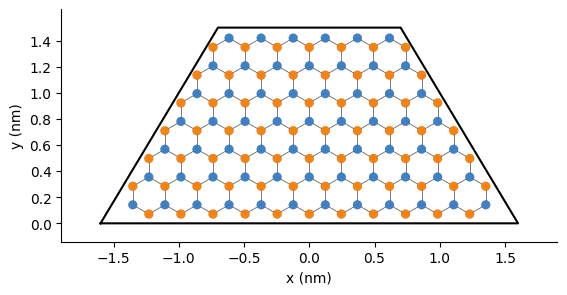

In [ ]:
def trapezoid(a, b, h):
    return pb.Polygon([[-a/2, 0], [-b/2, h], [b/2, h], [a/2, 0]])

model = pb.Model(
    graphene.monolayer(),
    trapezoid(a=3.2,b=1.4,h=1.5)
)

model.plot()
model.shape.plot()

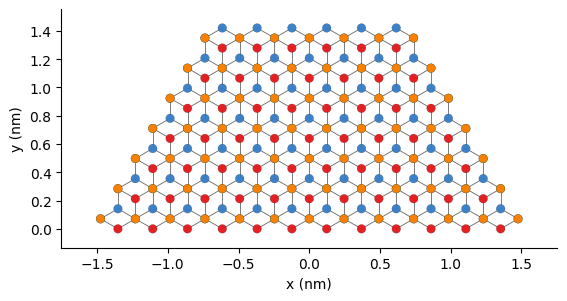

In [ ]:
model = pb.Model(
    graphene.bilayer(),
    trapezoid(a=3.2,b=1.4,h=1.5)
)

model.plot()
# model.shape.plot()

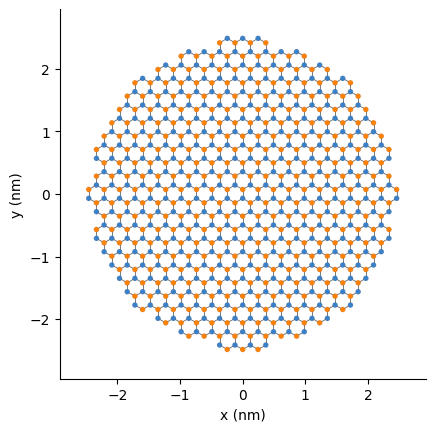

In [ ]:
import numpy as np
def circle(radius):
  def contains(x,y,z):
    return np.sqrt(x**2 + y**2) < radius
  return pb.FreeformShape(contains,width=[2*radius,2*radius])

model = pb.Model(
    graphene.monolayer(),
    circle(radius=2.5)
)
model.plot()

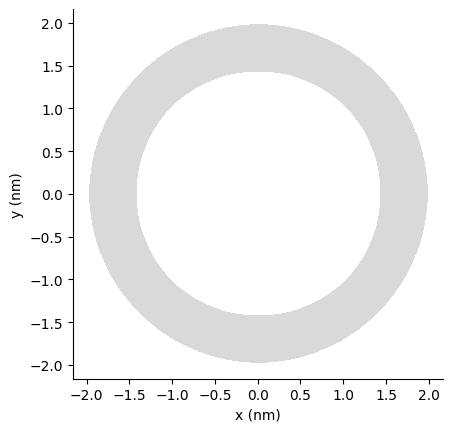

In [ ]:
def ring(inner_radius, outer_radius):
  def contains(x,y,z):
    r = np.sqrt(x**2 + y**2)
    return np.logical_and(inner_radius < r, r < outer_radius)
  return pb.FreeformShape(contains,width=[2*outer_radius,2*outer_radius])

shape = ring(inner_radius=1.4, outer_radius=2)
shape.plot()

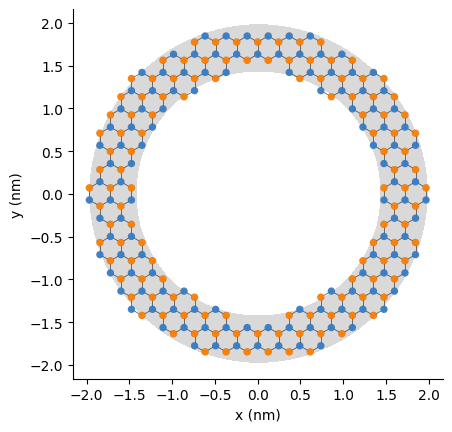

In [ ]:
model = pb.Model(
    graphene.monolayer(),
    ring(inner_radius=1.4,outer_radius=2)
)

model.plot()
model.shape.plot()

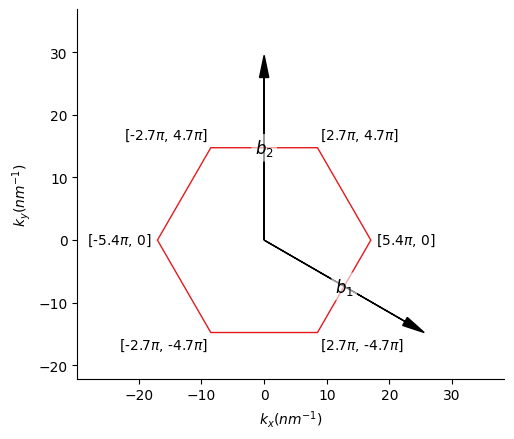

In [ ]:
model.lattice.plot_brillouin_zone()

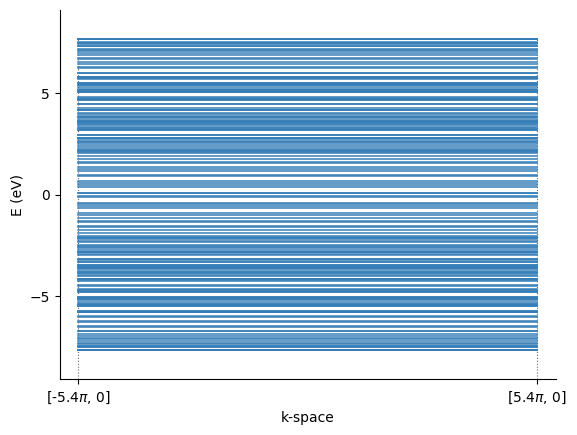

In [ ]:
from math import pi,sqrt
solver = pb.solver.lapack(model)
# Define the high-symmetry points
a_cc = graphene.a_cc
Gamma = [0, 0]
K1 = [-4 * pi / (3 * sqrt(3) * a_cc), 0]
M = [0, 2 * pi / (3 * a_cc)]

# Define the reciprocal lattice constant (assuming graphene lattice)
bands = solver.calc_bands([-pi*5.4,0], [pi*5.4,0])
bands.plot()

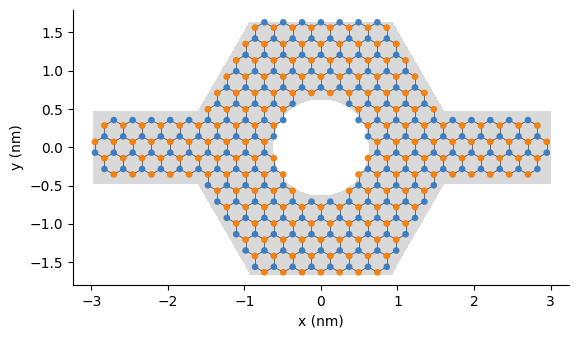

In [ ]:
# Simple shapes
rectangle = pb.rectangle(x=6,y=1)
hexagon = pb.regular_polygon(num_sides=6,radius=1.92,angle=np.pi/6)
circle = pb.circle(radius=0.6)

# Compose them naturally
shape = rectangle + hexagon - circle
model = pb.Model(
    graphene.monolayer(),
    shape
)
model.plot()
model.shape.plot()

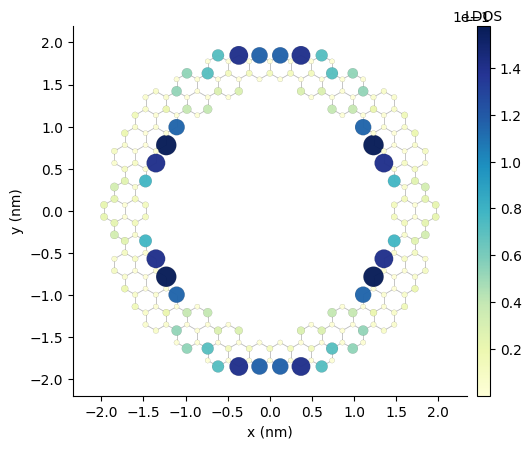

In [ ]:
model = pb.Model(
    graphene.monolayer(),
    ring(inner_radius=1.4,outer_radius=2)
)

solver = pb.solver.arpack(model,k=20)

ldos = solver.calc_spatial_ldos(energy=0,broadening=.05)
ldos.plot(site_radius=(0.03,0.12))
pb.pltutils.colorbar(label='LDOS')

#5. Shape and Symmetry

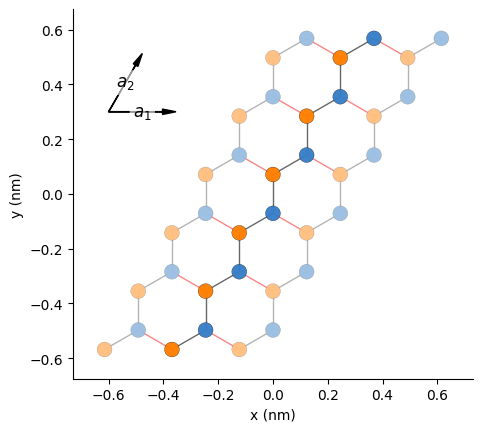

In [ ]:
from pybinding.repository import graphene

model = pb.Model(
    graphene.monolayer(),
    pb.rectangle(1.2),
    pb.translational_symmetry(a1=True,a2=False)
)
model.plot()
model.lattice.plot_vectors(position=[-0.6,.3])

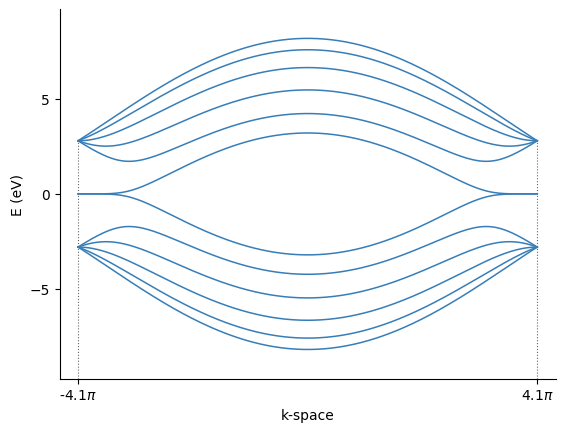

In [ ]:
from math import pi,sqrt

solver = pb.solver.lapack(model)
a = graphene.a_cc * sqrt(3) # ribbon unit cell length
bands = solver.calc_bands(-pi/a,pi/a)
bands.plot()

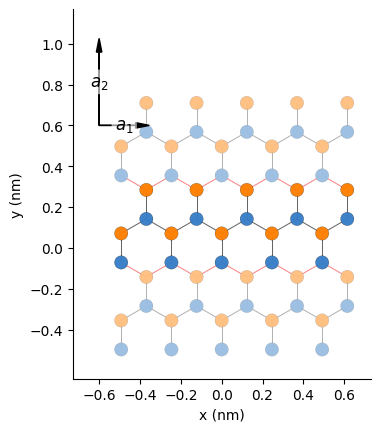

In [ ]:
model = pb.Model(
    graphene.monolayer_4atom(),
    pb.primitive(a1=5),
    pb.translational_symmetry(a1=False,a2=True)
)
model.plot()
model.lattice.plot_vectors(position=[-0.6,.6])

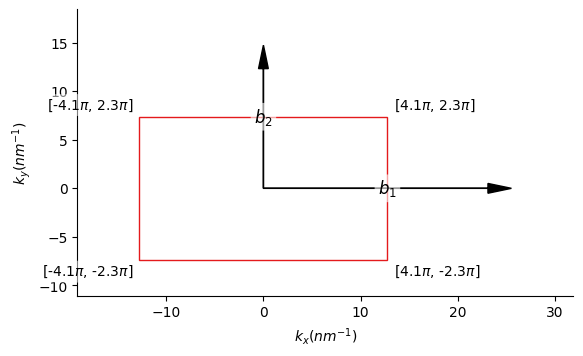

In [ ]:
model.lattice.plot_brillouin_zone()

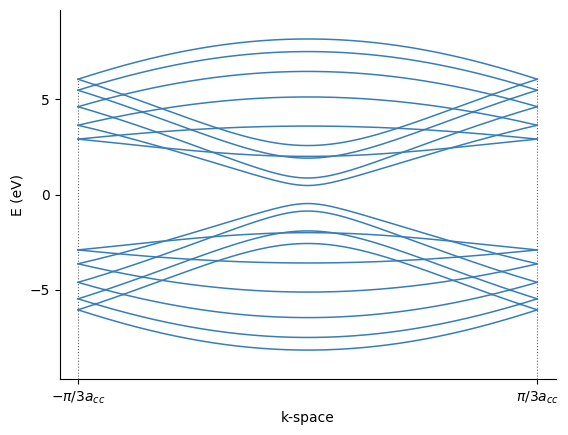

In [ ]:
solver = pb.solver.lapack(model)
d = 3* graphene.a_cc
bands = solver.calc_bands([0,-pi/d],[0,pi/d])
bands.plot(point_labels=['$-\pi / 3 a_{cc}$', '$\pi / 3 a_{cc}$'])

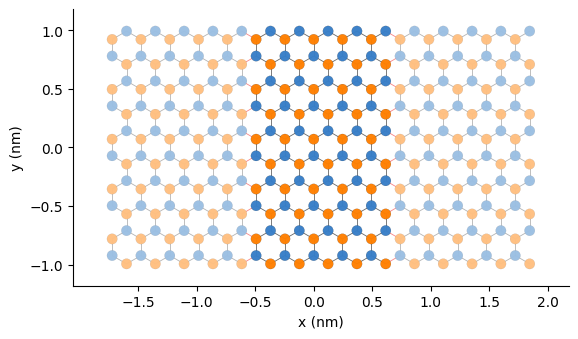

In [ ]:
model = pb.Model(
    graphene.monolayer_4atom(),
    pb.rectangle(x=2,y=2),
    pb.translational_symmetry(a1=1.2,a2=False)
)
model.plot()

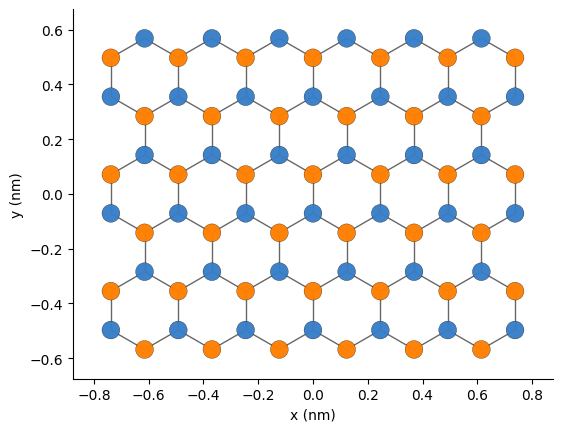

In [ ]:
model = pb.Model(
    graphene.monolayer_4atom(),
    pb.rectangle(x=1.5,y=1.5),
    pb.translational_symmetry(a1=1.7,a2=False)
)
model.plot()

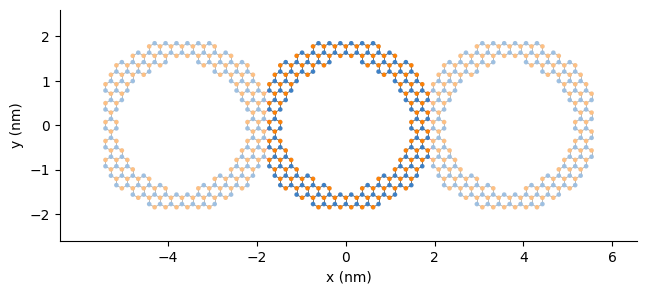

In [ ]:
import matplotlib.pyplot as plt

def ring(inner_radius, outer_radius):
    """Ring shape defined by an inner and outer radius"""
    def contains(x, y, z):
        r = np.sqrt(x**2 + y**2)
        return np.logical_and(inner_radius < r, r < outer_radius)
    return pb.FreeformShape(contains, width=[2*outer_radius, 2*outer_radius])

model = pb.Model(
    graphene.monolayer_4atom(),
    ring(inner_radius=1.4, outer_radius=2),
    pb.translational_symmetry(a1=3.8, a2=False)
)
plt.figure(figsize=[8, 3])
model.plot()

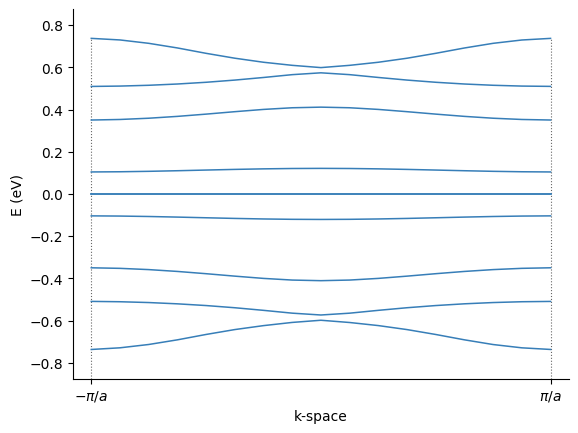

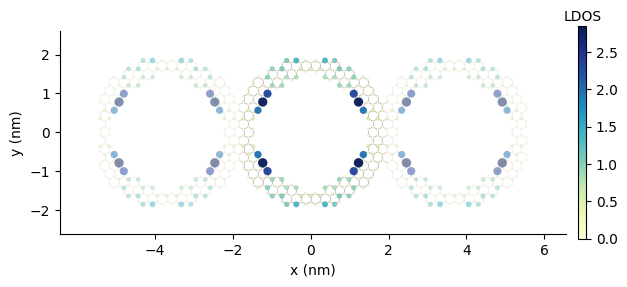

In [ ]:
solver = pb.solver.arpack(model, k=10)
a = 3.8  # [nm] unit cell length
bands = solver.calc_bands(-pi/a, pi/a)
bands.plot(point_labels=[r'$-\pi / a$', r'$\pi / a$'])
plt.show()

solver.set_wave_vector(k=pi/a)
ldos = solver.calc_spatial_ldos(energy=0, broadening=0.01)  # LDOS around 0 eV

plt.figure(figsize=pb.pltutils.cm2inch(20, 7))
ldos.plot(site_radius=(0.03, 0.12))
pb.pltutils.colorbar(label="LDOS")
plt.show()

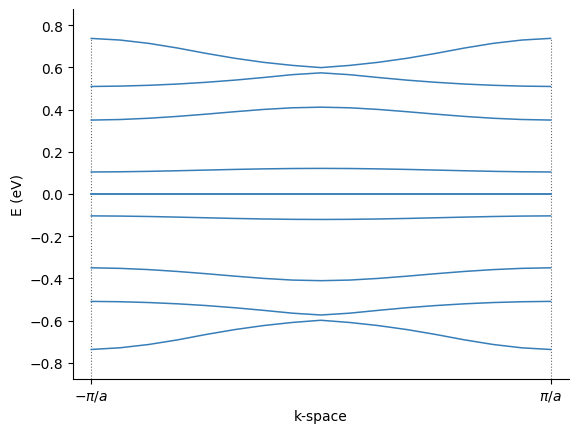

In [ ]:
solver = pb.solver.arpack(model,k=10)
a = 3.8
bands = solver.calc_bands(-pi/a,pi/a)
bands.plot(point_labels=['$-\pi / a$', '$\pi / a$'])

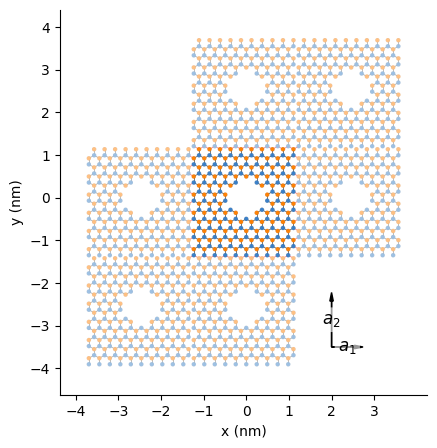

In [ ]:
width = 2.5
rectangle = pb.rectangle(x=width * 1.2, y=width * 1.2)
dot = pb.circle(radius=0.4)

model = pb.Model(
    graphene.monolayer_4atom(),
    rectangle - dot,
    pb.translational_symmetry(a1=width, a2=width)
)
plt.figure(figsize=(5, 5))
model.plot()
model.lattice.plot_vectors(position=[2, -3.5], scale=3)

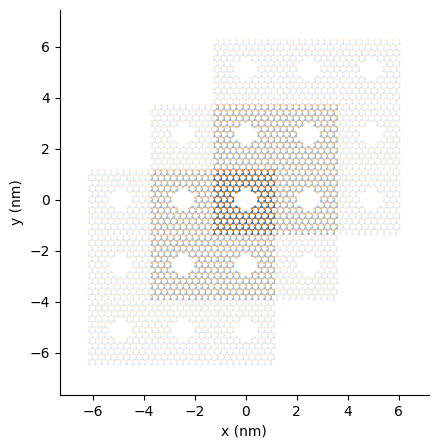

In [ ]:
plt.figure(figsize=(5, 5))
model.plot(num_periods=2)

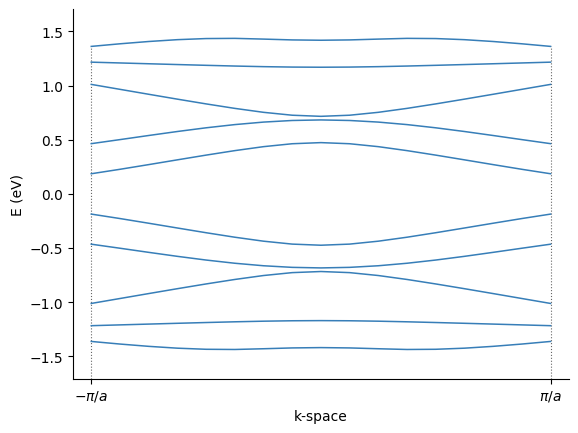

In [ ]:
solver = pb.solver.arpack(model,k=10)
a = 3.8
bands = solver.calc_bands(-pi/a,pi/a)
bands.plot(point_labels=['$-\pi / a$', '$\pi / a$'])

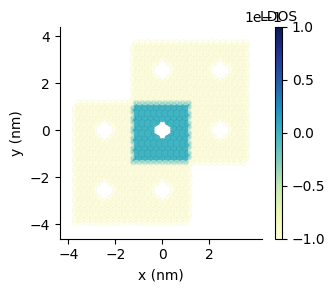

In [ ]:
solver.set_wave_vector(k=0)
ldos = solver.calc_spatial_ldos(energy=0, broadening=0.01)  # LDOS around 0 eV

plt.figure(figsize=pb.pltutils.cm2inch(20, 7))
ldos.plot(site_radius=(0.03, 0.12))
pb.pltutils.colorbar(label="LDOS")
plt.show()

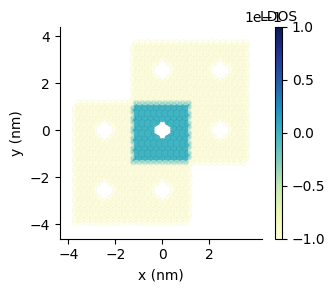

In [ ]:
solver.set_wave_vector(k=pi/a)
ldos = solver.calc_spatial_ldos(energy=0, broadening=0.01)  # LDOS around 0 eV

plt.figure(figsize=pb.pltutils.cm2inch(20, 7))
ldos.plot(site_radius=(0.03, 0.12))
pb.pltutils.colorbar(label="LDOS")
plt.show()

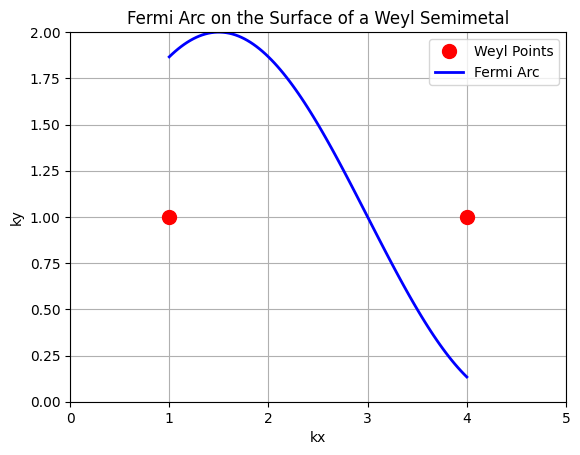

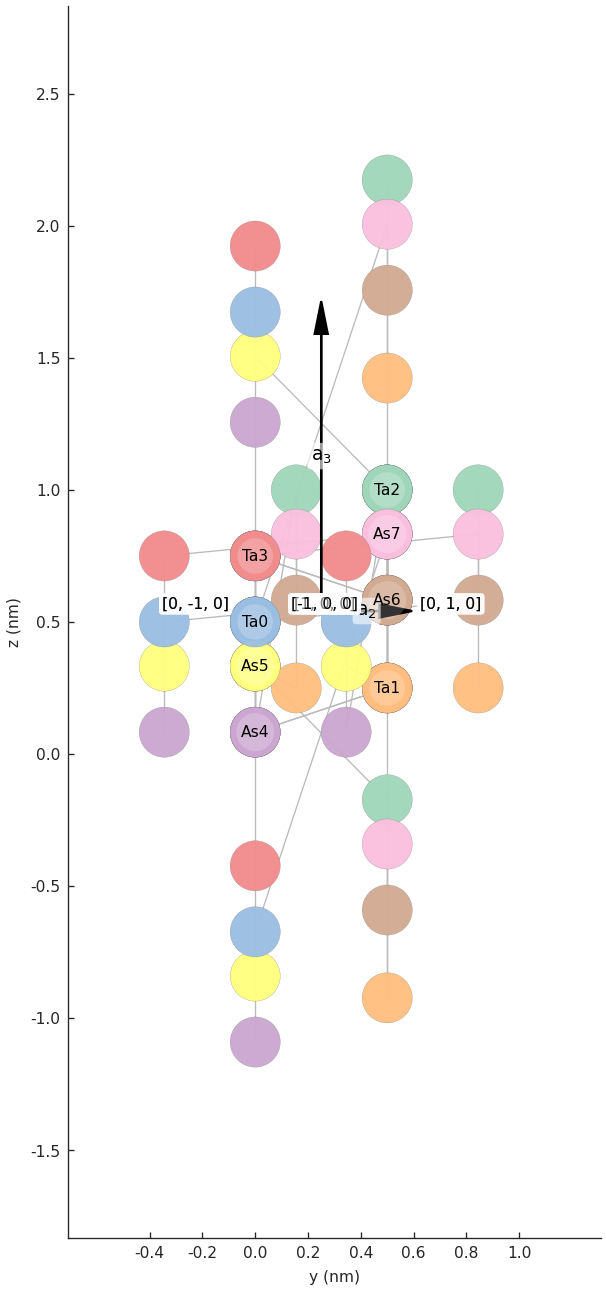

In [ ]:
import pybinding as pb
import numpy as np

# Define the lattice constants (in Ångström)
a = 3.44362672e-1
b = 3.44362672e-1
c = 11.73588307e-1

# Define the lattice vectors
lattice_vectors = [
    [a, 0, 0],
    [0, b, 0],
    [0, 0, c]
]

# Define the sublattices
sublattices = [
    ('Ta0', [0.5, 0.0, 0.49996730]),
    ('Ta1', [0.5, 0.5, 0.24996730]),
    ('Ta2', [0.0, 0.5, 0.99996730]),
    ('Ta3', [0.0, 0.0, 0.74996730]),
    ('As4', [0.5, 0.0, 0.08263212]),
    ('As5', [0.0, 0.0, 0.33263212]),
    ('As6', [0.0, 0.5, 0.58263212]),
    ('As7', [0.5, 0.5, 0.83263212])
]

# Create a custom lattice
lattice = pb.Lattice(a1=lattice_vectors[0], a2=lattice_vectors[1], a3=lattice_vectors[2])


# Add sublattices
for name, pos in sublattices:
    # print(name)
    lattice.add_sublattices((name, pos))
# Define hoppings (example nearest-neighbor hopping t)
t = 1.0


# Add hoppings based on the lattice symmetry and structure

hoppings = [
    ([0, 0, 0],'Ta0', 'As4', t),
    ([0, 0, 0],'Ta1', 'As7',t),
    ([0, 0, 0],'Ta2', 'As6',t),
    ([0, 0, 0],'Ta3', 'As5',t),

    ([1, 0, 0],'Ta0', 'As5', t),
    ([1, 0, 0],'Ta1', 'As4', t),
    ([1, 0, 0],'Ta2', 'As7', t),
    ([1, 0, 0],'Ta3', 'As6', t),

    ([0, 1, 0],'Ta0', 'As6', t),
    ([0, 1, 0],'Ta1', 'As5', t),
    ([0, 1, 0],'Ta2', 'As4', t),
    ([0, 1, 0],'Ta3', 'As7', t),

    ([0, 0, 1],'Ta0', 'As7', t),
    ([0, 0, 1],'Ta1', 'As6', t),
    ([0, 0, 1],'Ta2', 'As5', t),
    ([0, 0, 1],'Ta3', 'As4', t),
]


for hop in hoppings:
    lattice.add_hoppings(hop)

# Plot the lattice with adjusted size
plt.figure(figsize=(10, 10))  # Adjust the size as needed
lattice.plot(axes='yz')
plt.show()





[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


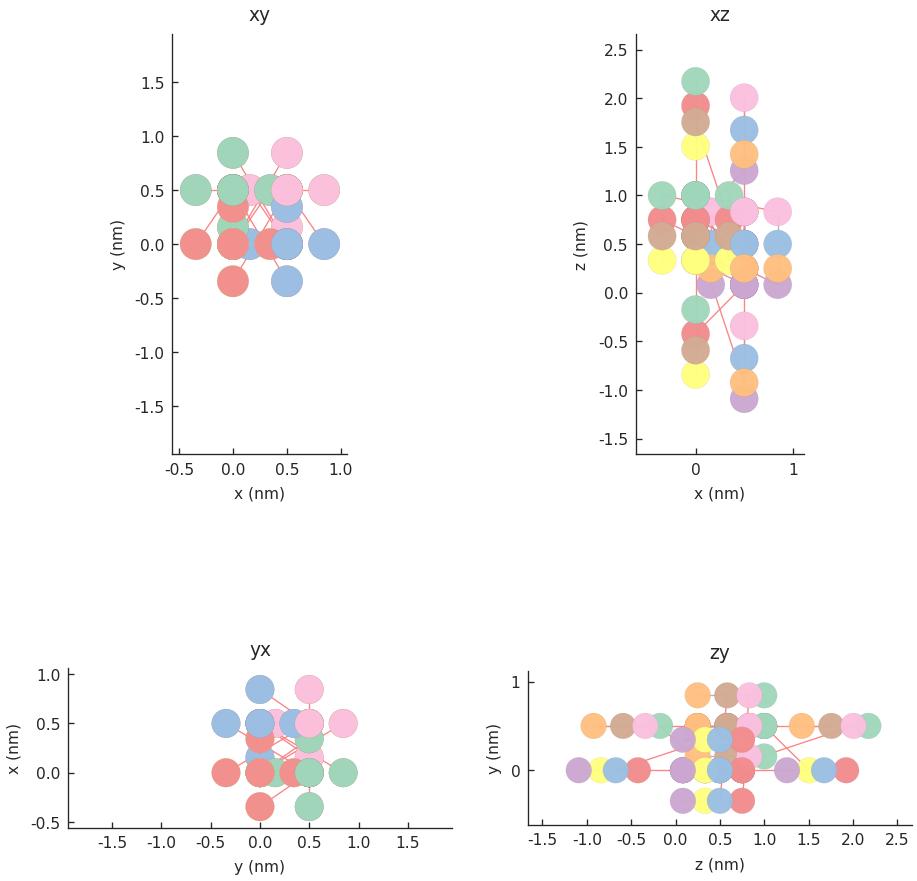

In [ ]:
# Finalize the model
model = pb.Model(
    lattice,
    pb.translational_symmetry(a1=True, a2=True)
    )

# Plot the lattice

plt.figure(figsize=(6.8, 7.5))
plt.subplot(221, title="xy", ylim=[-1.8, 1.8])
model.plot()
plt.subplot(222, title="xz")
model.plot(axes="xz")
plt.subplot(223, title="yx", xlim=[-1.8, 1.8])
model.plot(axes="yx")
plt.subplot(224, title="zy")
model.plot(axes="zy")
# model.lattice.plot_brillouin_zone(decorate=False)
# Setup the Hamiltonian
hamiltonian = model.hamiltonian.todense()

print(hamiltonian)

# # You can solve the model using pb.solve or other relevant methods
# solver = pb.solve(model)
# bands = solver.bands()
# bands.plot()

[[ 0.     +0.j  0.     +0.j  0.     +0.j  0.     +0.j  0.     +0.j
   0.     +0.j  0.     +0.j  0.     +0.j -0.08756+0.j -0.04404+0.j
  -0.08756+0.j -0.04404+0.j -0.08756+0.j -0.04404+0.j -0.08756+0.j
  -0.04404+0.j]
 [ 0.     +0.j  0.     +0.j  0.     +0.j  0.     +0.j  0.     +0.j
   0.     +0.j  0.     +0.j  0.     +0.j -0.04404+0.j -0.06262+0.j
  -0.04404+0.j -0.06262+0.j -0.04404+0.j -0.06262+0.j -0.04404+0.j
  -0.06262+0.j]
 [ 0.     +0.j  0.     +0.j  0.     +0.j  0.     +0.j  0.     +0.j
   0.     +0.j  0.     +0.j  0.     +0.j -0.08756+0.j -0.04404+0.j
  -0.08756+0.j -0.04404+0.j -0.08756+0.j -0.04404+0.j -0.08756+0.j
  -0.04404+0.j]
 [ 0.     +0.j  0.     +0.j  0.     +0.j  0.     +0.j  0.     +0.j
   0.     +0.j  0.     +0.j  0.     +0.j -0.04404+0.j -0.06262+0.j
  -0.04404+0.j -0.06262+0.j -0.04404+0.j -0.06262+0.j -0.04404+0.j
  -0.06262+0.j]
 [ 0.     +0.j  0.     +0.j  0.     +0.j  0.     +0.j  0.     +0.j
   0.     +0.j  0.     +0.j  0.     +0.j -0.08756+0.j -0.04404+0.

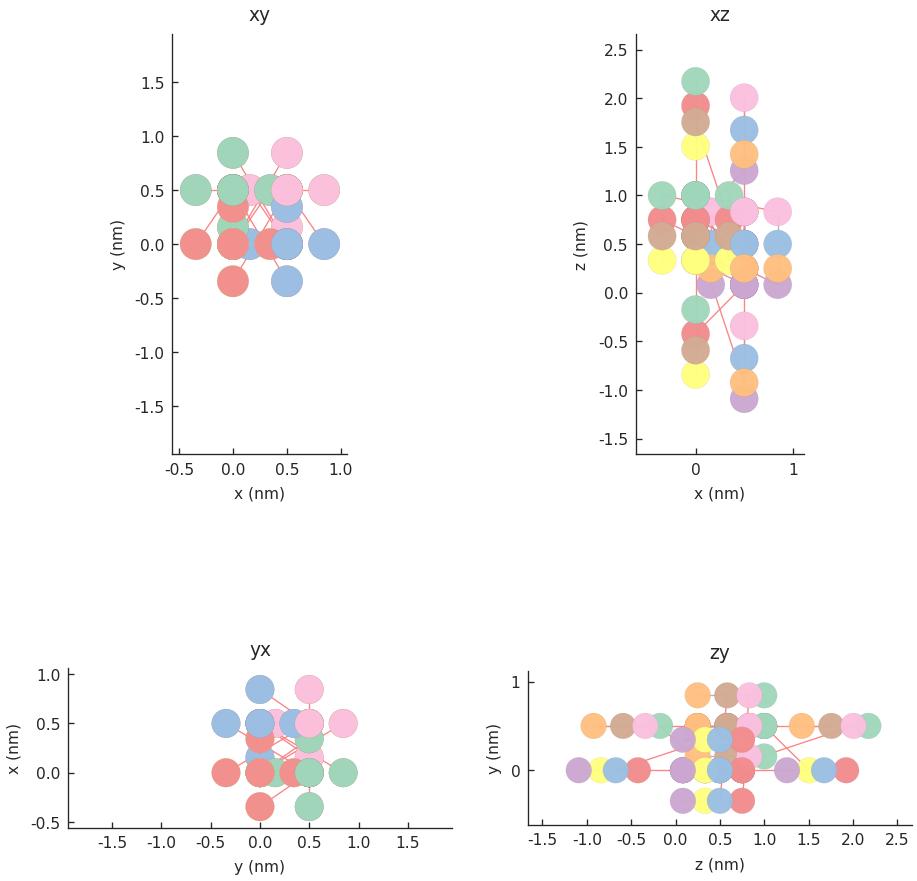

In [ ]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt

# Define the lattice constants (in Ångström)
a = 3.44362672e-1
b = 3.44362672e-1
c = 11.73588307e-1

# Define the lattice vectors
lattice_vectors = [
    [a, 0, 0],
    [0, b, 0],
    [0, 0, c]
]

# Define the sublattices with multi-orbital structure
sublattices = [
    ('Ta0', [0.5, 0.0, 0.49996730], np.zeros((2, 2))),
    ('Ta1', [0.5, 0.5, 0.24996730], np.zeros((2, 2))),
    ('Ta2', [0.0, 0.5, 0.99996730], np.zeros((2, 2))),
    ('Ta3', [0.0, 0.0, 0.74996730], np.zeros((2, 2))),
    ('As4', [0.5, 0.0, 0.08263212], np.zeros((2, 2))),
    ('As5', [0.0, 0.0, 0.33263212], np.zeros((2, 2))),
    ('As6', [0.0, 0.5, 0.58263212], np.zeros((2, 2))),
    ('As7', [0.5, 0.5, 0.83263212], np.zeros((2, 2)))
]

# Create a custom lattice
lattice = pb.Lattice(a1=lattice_vectors[0], a2=lattice_vectors[1], a3=lattice_vectors[2])

# Add sublattices
for name, pos, onsite in sublattices:
    lattice.add_sublattices((name, pos, onsite))

# Define hopping parameters (example nearest-neighbor hopping t)
t_ss = -0.08756  # Example value for s-s hopping
t_sp = -0.04404  # Example value for s-p hopping
t_pp = -0.06262  # Example value for p-p hopping

# Add hopping parameters based on the structure
hoppings = [
    ([0, 0, 0], 'Ta0', 'As4', [[t_ss, t_sp], [t_sp, t_pp]]),
    ([0, 0, 0], 'Ta1', 'As7', [[t_ss, t_sp], [t_sp, t_pp]]),
    ([0, 0, 0], 'Ta2', 'As6', [[t_ss, t_sp], [t_sp, t_pp]]),
    ([0, 0, 0], 'Ta3', 'As5', [[t_ss, t_sp], [t_sp, t_pp]]),

    ([1, 0, 0], 'Ta0', 'As5', [[t_ss, t_sp], [t_sp, t_pp]]),
    ([1, 0, 0], 'Ta1', 'As4', [[t_ss, t_sp], [t_sp, t_pp]]),
    ([1, 0, 0], 'Ta2', 'As7', [[t_ss, t_sp], [t_sp, t_pp]]),
    ([1, 0, 0], 'Ta3', 'As6', [[t_ss, t_sp], [t_sp, t_pp]]),

    ([0, 1, 0], 'Ta0', 'As6', [[t_ss, t_sp], [t_sp, t_pp]]),
    ([0, 1, 0], 'Ta1', 'As5', [[t_ss, t_sp], [t_sp, t_pp]]),
    ([0, 1, 0], 'Ta2', 'As4', [[t_ss, t_sp], [t_sp, t_pp]]),
    ([0, 1, 0], 'Ta3', 'As7', [[t_ss, t_sp], [t_sp, t_pp]]),

    ([0, 0, 1], 'Ta0', 'As7', [[t_ss, t_sp], [t_sp, t_pp]]),
    ([0, 0, 1], 'Ta1', 'As6', [[t_ss, t_sp], [t_sp, t_pp]]),
    ([0, 0, 1], 'Ta2', 'As5', [[t_ss, t_sp], [t_sp, t_pp]]),
    ([0, 0, 1], 'Ta3', 'As4', [[t_ss, t_sp], [t_sp, t_pp]]),
]

for hop in hoppings:
    lattice.add_hoppings(hop)

# Plot the lattice with adjusted size


# Finalize the model with translational symmetry in all three directions
model = pb.Model(
    lattice,
    pb.translational_symmetry(a1=True, a2=True, a3=True)
)


# Plot the lattice

plt.figure(figsize=(6.8, 7.5))
plt.subplot(221, title="xy", ylim=[-1.8, 1.8])
model.plot()
plt.subplot(222, title="xz")
model.plot(axes="xz")
plt.subplot(223, title="yx", xlim=[-1.8, 1.8])
model.plot(axes="yx")
plt.subplot(224, title="zy")
model.plot(axes="zy")
# model.lattice.plot_brillouin_zone(decorate=False)
# Setup the Hamiltonian
hamiltonian = model.hamiltonian.todense()

print(hamiltonian)




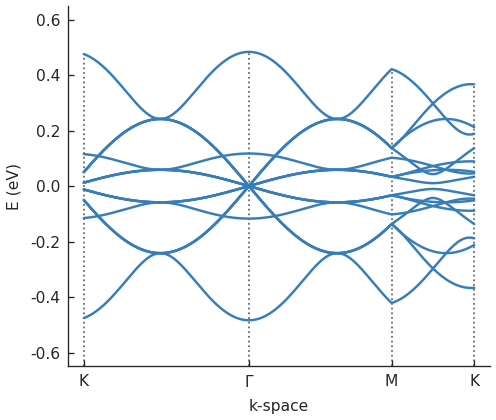

In [ ]:
# # You can solve the model using pb.solve or other relevant methods

# Solve the model (if needed)
solver = pb.solver.lapack(model)
Gamma = [0, 0]
K1 = [-4*pi / (3*sqrt(3)*a_cc), 0]
M = [0, 2*pi / (3*a_cc)]
K2 = [2*pi / (3*sqrt(3)*a_cc), 2*pi / (3*a_cc)]

bands = solver.calc_bands(K1, Gamma, M, K2)
bands.plot(point_labels=['K', r'$\Gamma$', 'M', 'K'])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Activate interactive mode for Jupyter Notebook in VS Code
%matplotlib widget

# Parameters
a = 1  # lattice constant
M = 2  # mass term
kz = 0  # fixed k_z value

# Define the Hamiltonian components
def energy(kx, ky, kz, M, a):
    sin_kx_a = np.sin(kx * a)
    sin_ky_a = np.sin(ky * a)
    cos_kx_a = np.cos(kx * a)
    cos_ky_a = np.cos(ky * a)
    cos_kz_a = np.cos(kz * a)
    H_z = M - cos_kx_a - cos_ky_a - cos_kz_a
    energy = np.sqrt(sin_kx_a**2 + sin_ky_a**2 + H_z**2)
    return energy

# Create a grid of kx, ky values
kx = np.linspace(-np.pi, np.pi, 100)
ky = np.linspace(-np.pi, np.pi, 100)
kx, ky = np.meshgrid(kx, ky)

# Calculate energy values
E = energy(kx, ky, kz, M, a)

# Create the figure
fig = plt.figure(figsize=(15, 10))

# XY view
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(kx, ky, E, cmap='viridis', edgecolor='k')
ax1.plot_surface(kx, ky, -E, cmap='viridis', edgecolor='k')
ax1.set_xlabel('$k_x$')
ax1.set_ylabel('$k_y$')
ax1.set_zlabel('$E$')
ax1.set_title('XY View')
ax1.view_init(elev=90, azim=-90)

# YZ view
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(kx, ky, E, cmap='viridis', edgecolor='k')
ax2.plot_surface(kx, ky, -E, cmap='viridis', edgecolor='k')
ax2.set_xlabel('$k_x$')
ax2.set_ylabel('$k_y$')
ax2.set_zlabel('$E$')
ax2.set_title('YZ View')
ax2.view_init(elev=0, azim=0)

# XZ view
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(kx, ky, E, cmap='viridis', edgecolor='k')
ax3.plot_surface(kx, ky, -E, cmap='viridis', edgecolor='k')
ax3.set_xlabel('$k_x$')
ax3.set_ylabel('$k_y$')
ax3.set_zlabel('$E$')
ax3.set_title('XZ View')
ax3.view_init(elev=0, azim=90)

plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

In [ ]:
!pip install pybinding

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pybinding: filename=pybinding-0.9.5-cp310-cp310-linux_x86_64.whl size=1033753 sha256=bf7902b190438a14b532cecf3ccd4f41a0cb849ffbb26dfaf7ee21aaf3e3a83c
  Stored in directory: /root/.cache/pip/wheels/e7/42/97/1f8177173309e928f2b6aad57d26477a259eb415af30e7fb81
Successfully built pybinding


In [ ]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt

# Define the function to parse the wannier90_hr.dat file and extract hopping parameters
def parse_wannier90_hr(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Extract number of Wannier functions and number of hopping parameters
    num_wannier = int(lines[1].strip())
    num_hoppings = int(lines[2].strip())

    # The hopping parameters start after the degeneracy list
    degeneracy_lines = (num_wannier // 15) + 3
    hopping_lines = lines[degeneracy_lines:]

    # Parse the hopping parameters
    hopping_parameters = []
    for line in hopping_lines:
        parts = line.split()
        if len(parts) == 7:
            R = tuple(map(int, parts[:3]))  # Lattice vector
            i = int(parts[3])               # Initial Wannier state
            j = int(parts[4])               # Final Wannier state
            t_real = float(parts[5])        # Real part of hopping parameter
            t_imag = float(parts[6])        # Imaginary part of hopping parameter
            hopping_parameters.append((R, i, j, t_real, t_imag))

    return hopping_parameters

# Parse the hopping parameters from the provided file
file_path = './wannier90_hr.dat'
hopping_parameters = parse_wannier90_hr(file_path)

# Define the lattice constants (in Ångström)
a = 3.44362672e-1
b = 3.44362672e-1
c = 11.73588307e-1

# Define the lattice vectors
lattice_vectors = [
    [a, 0, 0],
    [0, b, 0],
    [0, 0, c]
]

# Define the sublattices with multi-orbital structure
sublattices = [
    ('Ta0', [0.5, 0.0, 0.49996730], np.zeros((2, 2))),
    ('Ta1', [0.5, 0.5, 0.24996730], np.zeros((2, 2))),
    ('Ta2', [0.0, 0.5, 0.99996730], np.zeros((2, 2))),
    ('Ta3', [0.0, 0.0, 0.74996730], np.zeros((2, 2))),
    ('As4', [0.5, 0.0, 0.08263212], np.zeros((2, 2))),
    ('As5', [0.0, 0.0, 0.33263212], np.zeros((2, 2))),
    ('As6', [0.0, 0.5, 0.58263212], np.zeros((2, 2))),
    ('As7', [0.5, 0.5, 0.83263212], np.zeros((2, 2)))
]

# Create a custom lattice
lattice = pb.Lattice(a1=lattice_vectors[0], a2=lattice_vectors[1], a3=lattice_vectors[2])

# Add sublattices
for name, pos, onsite in sublattices:
    lattice.add_sublattices((name, pos, onsite))

# Define a function to convert hopping parameters to pybinding format
def add_hopping_parameters(lattice, hopping_params):
    for param in hopping_params:
        R, i, j, t_real, t_imag = param
        hopping = t_real + 1j * t_imag  # Complex hopping parameter
        lattice.add_hoppings(([R[0], R[1], R[2]], f'Ta{i-1}', f'As{j-1}', hopping))

# Add the hopping parameters to the lattice
add_hopping_parameters(lattice, hopping_parameters)

# Finalize the model with translational symmetry in all three directions
model = pb.Model(
    lattice,
    pb.translational_symmetry(a1=True, a2=True, a3=True)
)

# Plot the lattice
plt.figure(figsize=(6.8, 7.5))
plt.subplot(221, title="xy", ylim=[-1.8, 1.8])
model.plot()
plt.subplot(222, title="xz")
model.plot(axes="xz")
plt.subplot(223, title="yx", xlim=[-1.8, 1.8])
model.plot(axes="yx")
plt.subplot(224, title="zy")
model.plot(axes="zy")

# Setup the Hamiltonian
hamiltonian = model.hamiltonian.todense()
print(hamiltonian)


FileNotFoundError: [Errno 2] No such file or directory: './wannier90_hr.dat'